<center><img src="https://raw.githubusercontent.com/hushchyn-mikhail/gen_models_ai_hse/3ce5af8a2e783907cdf9f093f62fef659040241d/2024/homeworks/hw3/img/logo_hse.png" width="1000"></center>

<h1><center>Генеративные модели в машинном обучении, МОВС, ФКН ВШЭ</center></h1>
<h2><center>Домашнее задание 3: Диффузия, потоки</center></h2>

# Введение

До заголовка "Диффузионные модели" все по-старому. Только Задания 1-2 теперь неоцениваемые, ведь вы их уже делали

## MAGIC – Major Atmospheric Gamma Imaging Cherenkov Telescope

MAGIC (Major Atmospheric Gamma Imaging Cherenkov) - это система, состоящая из двух черенковских телескопов диаметром 17 м. Они предназначены для наблюдения гамма-лучей от галактических и внегалактических источников в диапазоне очень высоких энергий (от 30 ГэВ до 100 ТэВ).

MAGIC позволил открыть и исследовать новые классы источников гамма-излучения, таких как, например, пульсары и гамма-всплески (GRB).

<center><img src="https://raw.githubusercontent.com/hushchyn-mikhail/gen_models_ai_hse/3ce5af8a2e783907cdf9f093f62fef659040241d/2024/homeworks/hw3/img/magic1.jpg" width="1000"></center>

Источник: https://magic.mpp.mpg.de/

Youtube video: https://youtu.be/mjcDSR2vSU8

    Ок, давайте зафиксируем. Какой-то крутой телескоп позволяет открыть новые виды излучения. Идем дальше.

## Частицы из космоса

Космические частицы, $\gamma$-кванты (фотоны) и адроны (протоны), взаимодействуют с атмосферой и порождают ливни вторичных частиц. Двигаясь с околосветовой скоростью, эти частицы излучают Черенковское излучение. Телескопы фотографируют это излучение.

    По фотографиям можно определить тип частицы из космоса: фотон или протон. Знакомая формулировка задачи, не правда ли?

<center><img src="https://raw.githubusercontent.com/hushchyn-mikhail/gen_models_ai_hse/3ce5af8a2e783907cdf9f093f62fef659040241d/2024/homeworks/hw3/img/shower.jpg" width="500"></center>

## Фотографии

Задача атмосферного черенковского телескопа - получить изображение ливня путем измерения черенковского света от частиц ливня. Это изображение представляет собой геометрическую проекцию ливня на детектор. Для анализа этих изображений были введены параметры изображения или так называемые параметры Хилласа. Ниже пример такой фотографии.

<center><img src="https://raw.githubusercontent.com/hushchyn-mikhail/gen_models_ai_hse/3ce5af8a2e783907cdf9f093f62fef659040241d/2024/homeworks/hw3/img/geo.jpg" width="400"></center>

    Итак, каждая фотография описывается набором параметров, которые за нас считает телесоп. А что там с двумя видами частиц?

## Фотоны vs адронов

Изображения для $\gamma$-квантов (фотонов) и адронов (протонов) отличаются по форме кластеров. Астрономы используют модели машинного обучения для классификации этих изображений. Получение каждого такого изображения - дорогое удовольствие!


<center><img src="https://raw.githubusercontent.com/hushchyn-mikhail/gen_models_ai_hse/3ce5af8a2e783907cdf9f093f62fef659040241d/2024/homeworks/hw3/img/gamma_p.png" width="600"></center>

Для обучения моделей ученые искусственно генерируют такие изображения для каждого типа частиц с помощью сложных физических симуляторов.

    Итак, давайте сэкономим денег для ученых и сгенерируем хороших фотографий разных частиц. Используем для этого GAN и диффузионные модели!

In [1]:
!pip install diffusers -q

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

colab_path = '/content/drive/MyDrive/Colab Notebooks/DL_GEN_MODELS/HW3/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Данные

Будем использовать данные телескопа MAGIC из UCI репозитория https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. Каждый объект в данных - параметры одного изображения кластера и метка этого кластера (фотон или адрон):


0. Length: major axis of ellipse [mm]
1. Width: minor axis of ellipse [mm]
2. Size: 10-log of sum of content of all pixels [in #phot]
3. Conc: ratio of sum of two highest pixels over fSize [ratio]
4. Conc1: ratio of highest pixel over fSize [ratio]
5. Asym: distance from highest pixel to center, projected onto major axis [mm]
6. M3Long: 3rd root of third moment along major axis [mm]
7. M3Trans: 3rd root of third moment along minor axis [mm]
8. Alpha: angle of major axis with vector to origin [deg]
9. Dist: distance from origin to center of ellipse [mm]
10. class: g,h # gamma (signal), hadron (background)

In [7]:
# read data
names = np.array(
    [
        "Length",
        "Width",
        "Size",
        "Conc",
        "Conc1",
        "Asym",
        "M3Long",
        "M3Trans",
        "Alpha",
        "Dist",
        "class",
    ]
)
data = pd.read_csv(f"{colab_path}data/magic04.data", header=None)
data.columns = names
print(data.shape)
data.head()

(19020, 11)


,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# Постановка задачи

Ваша задача заключается в том, чтобы с помощью генеративно-состязательных сетей научиться генерировать параметры кластеров на изображениях телескопа для каждого типа частиц (фотона или адрона):

- $X$ - матрица реальных объектов, которые нужно начиться генерировать;
- $y$ - метки классов, которые будем использовать как условие при генерации.

In [8]:
# параметры кластеров на изображениях
X = data[names[:-1]].values
X = np.abs(X)

# метки классов
labels = data[names[-1]].values
y = np.ones((len(labels), 1))
y[labels == "h"] = 0

In [9]:
# примеры
X[:2]

array([[2.87967e+01, 1.60021e+01, 2.64490e+00, 3.91800e-01, 1.98200e-01,
        2.77004e+01, 2.20110e+01, 8.20270e+00, 4.00920e+01, 8.18828e+01],
       [3.16036e+01, 1.17235e+01, 2.51850e+00, 5.30300e-01, 3.77300e-01,
        2.62722e+01, 2.38238e+01, 9.95740e+00, 6.36090e+00, 2.05261e+02]])

In [10]:
# примеры
y[:2]

array([[1.],
       [1.]])

In [11]:
# все возможные значения
np.unique(y)

array([0., 1.])

# Визуализация данных

Каждое изображение описывается 10 параметрами. Давайте построим распределения значений каждого параметра для каждого типа частиц.

In [12]:
def plot_hists(X1, X2, names, label1, label2, bins=np.linspace(-3, 3, 61)):
    plt.figure(figsize=(5 * 4, 5 * 2))
    for i in range(X1.shape[1]):
        plt.subplot(3, 4, i + 1)
        plt.grid()
        plt.hist(X1[:, i], bins=bins, alpha=0.3, label=label1, color="C4")
        plt.hist(X2[:, i], bins=bins, alpha=0.3, label=label2, color="C0")
        plt.xlabel(names[i], size=14)
        plt.legend(loc="best")
    plt.tight_layout()

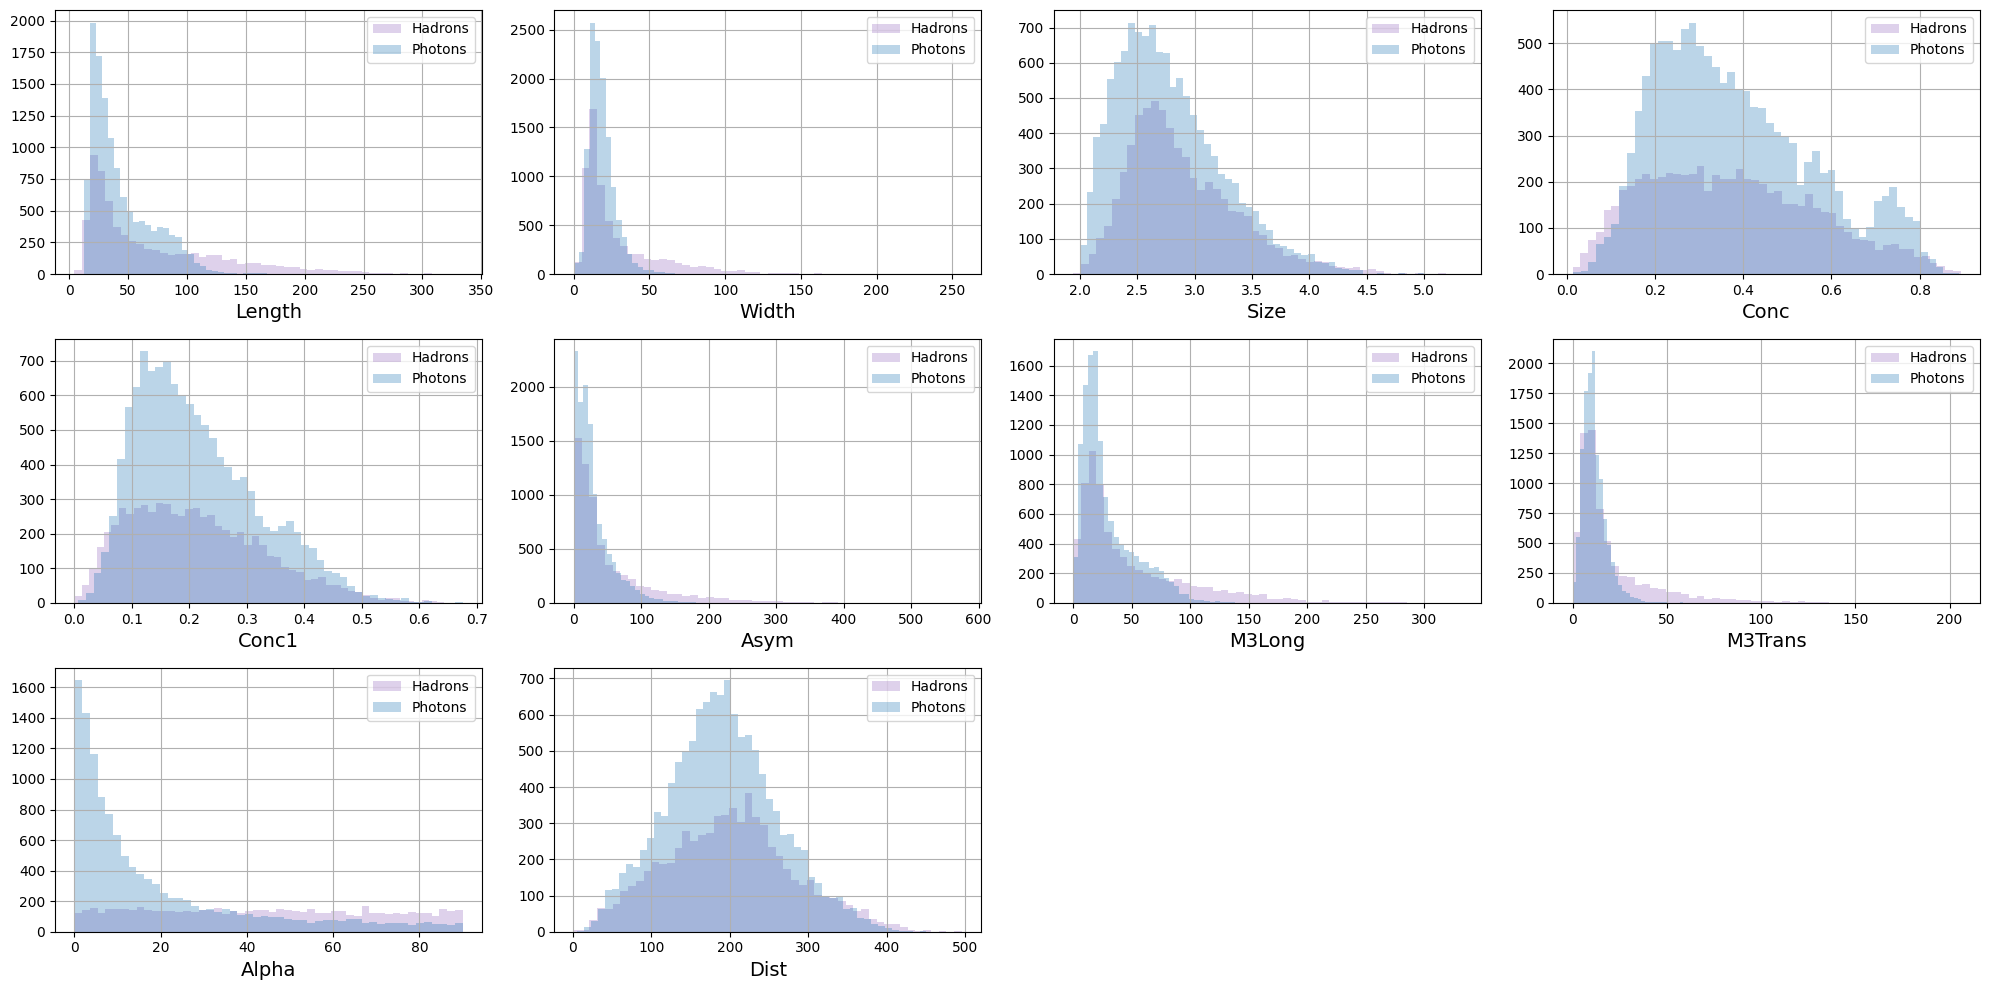

In [13]:
plot_hists(
    X[y[:, 0] == 0], X[y[:, 0] == 1], names, label1="Hadrons", label2="Photons", bins=50
)

# Предобработка данных

Из графика видим, что распределения для многих признаков имеют тяжелые хвосты. Это делает обучение генеративных моделей тяжелее. Поэтому нужно как-то преобразовать данные, чтобы убрать эти тяжелые хвосты.

# Обучающая и тестовая выборки

In [14]:
from sklearn.model_selection import train_test_split

# train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.5, shuffle = True, random_state = 11
)

## Задание 1 (0 баллов)

Проиллюстрируйте распределение y внутри train и test выборки.

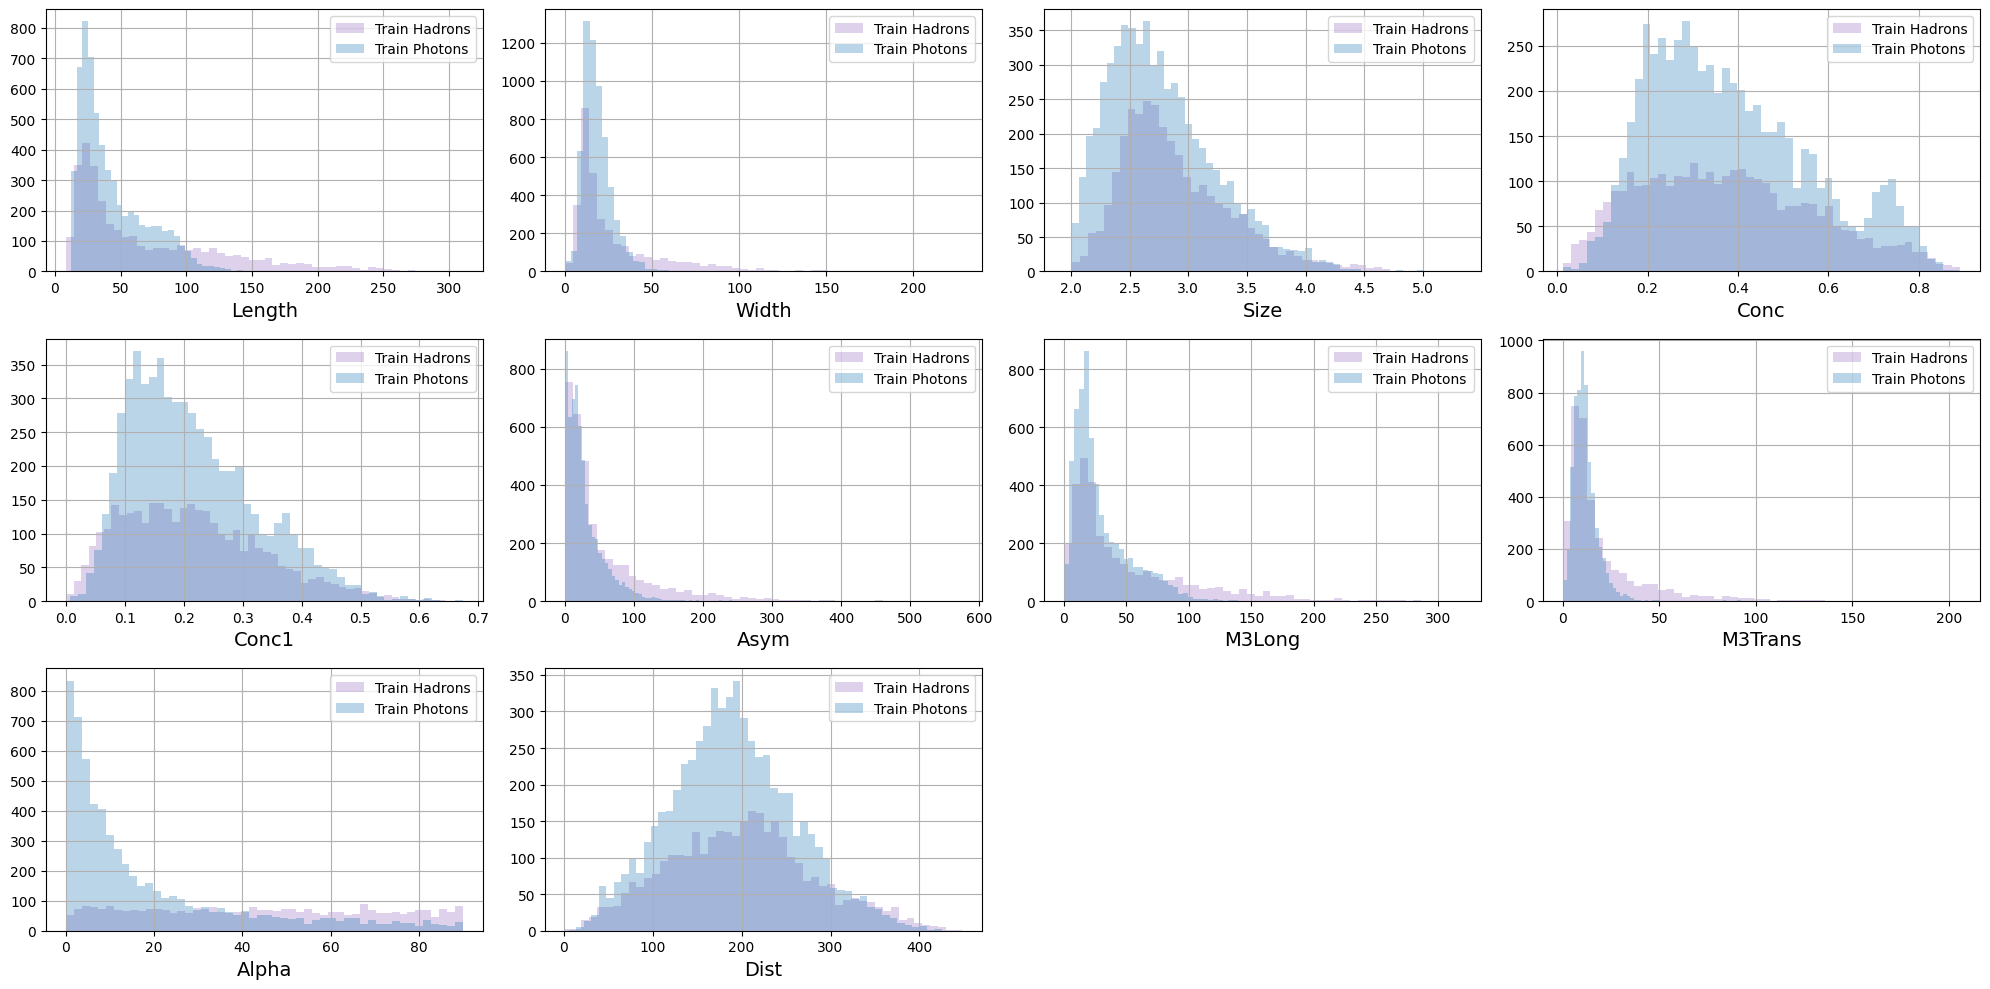

In [15]:
plot_hists(
    X_train[y_train[:, 0] == 0],
    X_train[y_train[:, 0] == 1],
    names,
    label1="Train Hadrons",
    label2="Train Photons",
    bins=50,
)

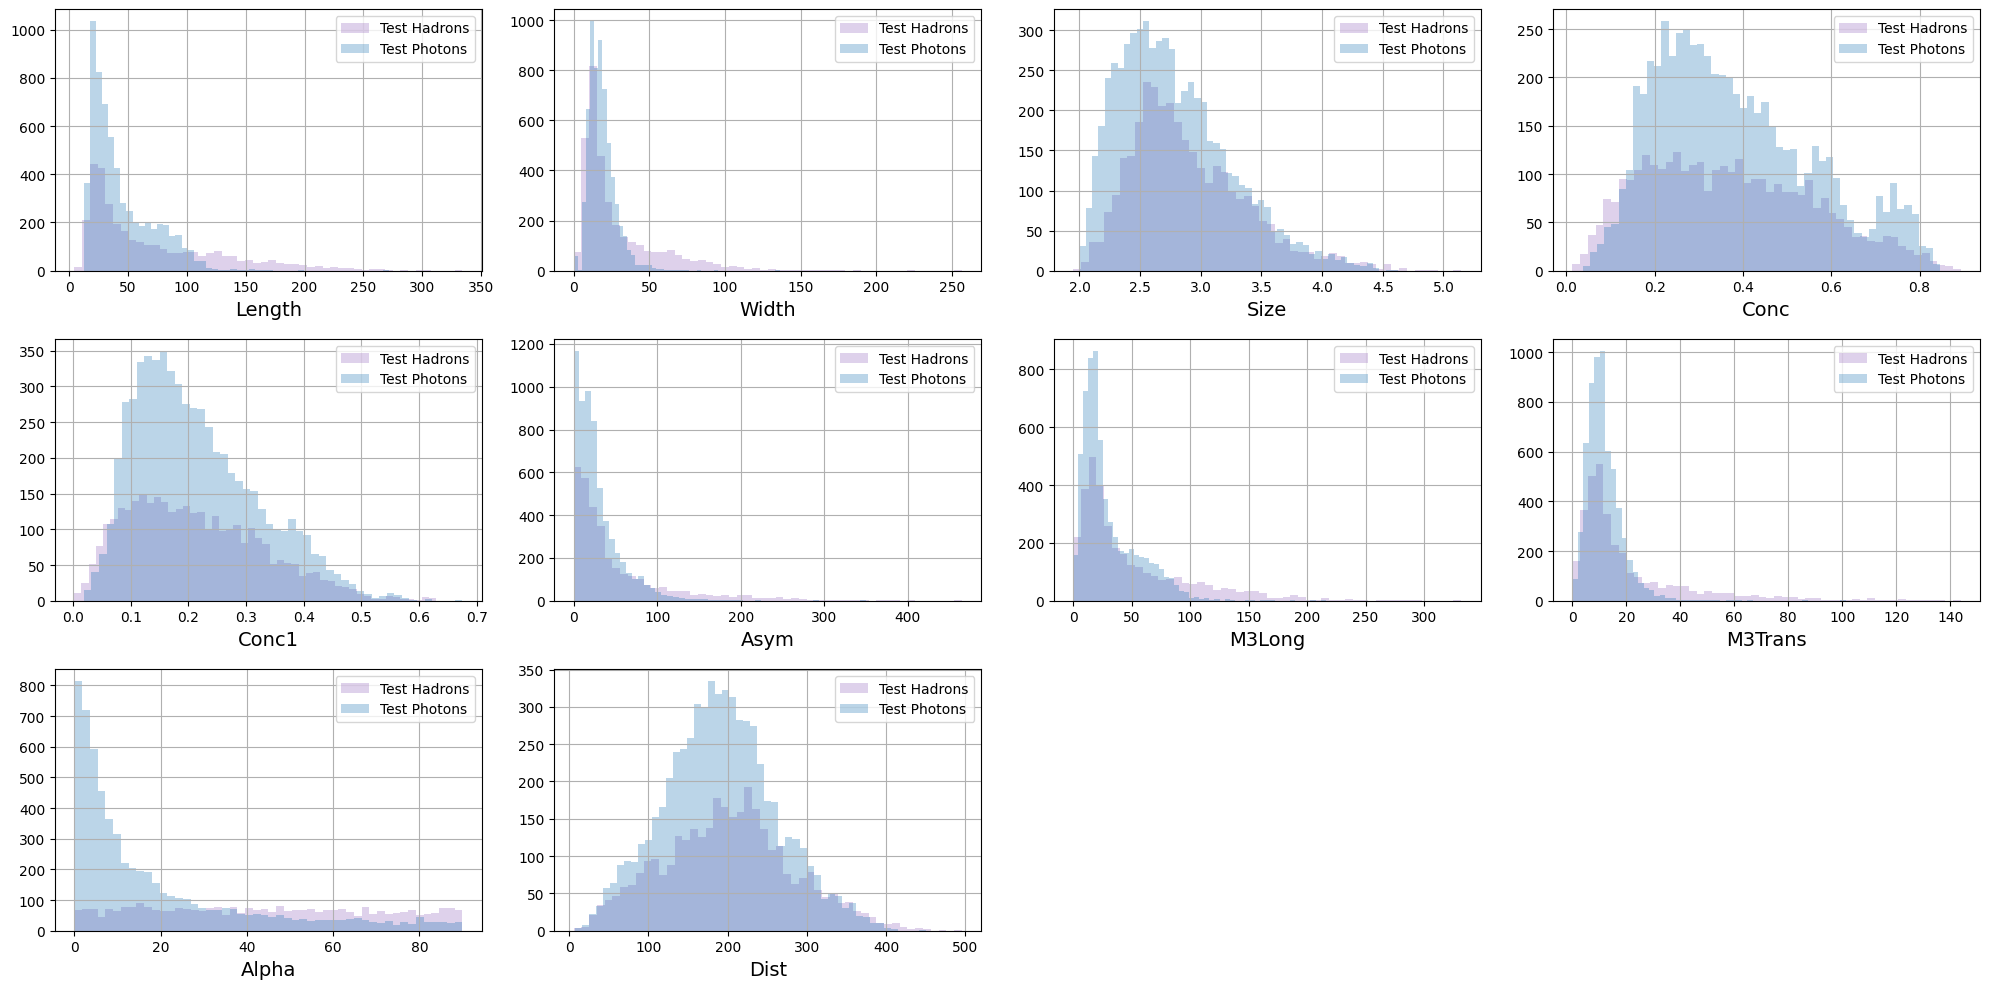

In [16]:
plot_hists(
    X_test[y_test[:, 0] == 0],
    X_test[y_test[:, 0] == 1],
    names,
    label1="Test Hadrons",
    label2="Test Photons",
    bins=50,
)

## Задание 2 (0 баллов)

Используя функцию `sklearn.preprocessing.QuantileTransformer` трансформируйте входные данные `X_train` и `X_test`. Это преобразование делает так, чтобы распределение каждого параметра было нормальным. Описание функции доступно по [ссылке](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html). Используйте значение параметра `output_distribution='normal'`.

In [17]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=1000, random_state=42, output_distribution='normal')
X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

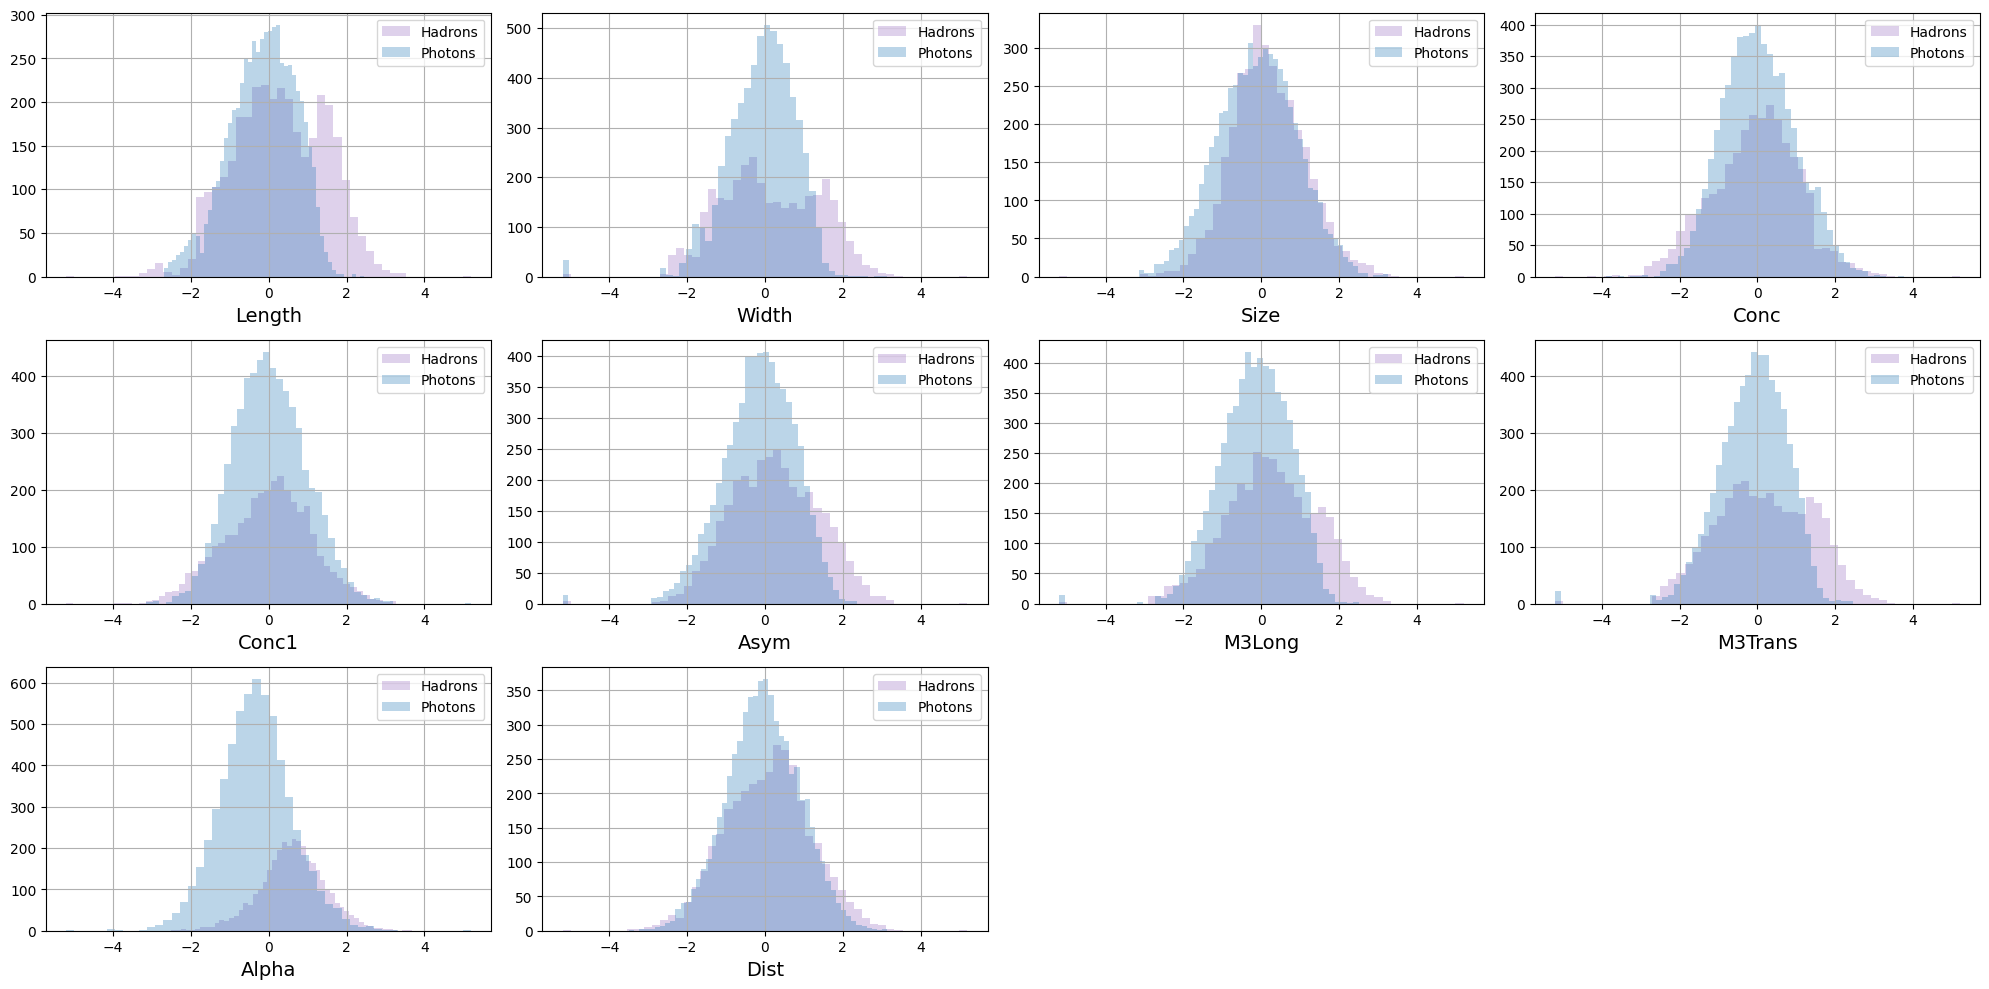

In [18]:
plot_hists(
    X_train[y_train[:, 0] == 0],
    X_train[y_train[:, 0] == 1],
    names,
    label1="Hadrons",
    label2="Photons",
    bins=50,
)

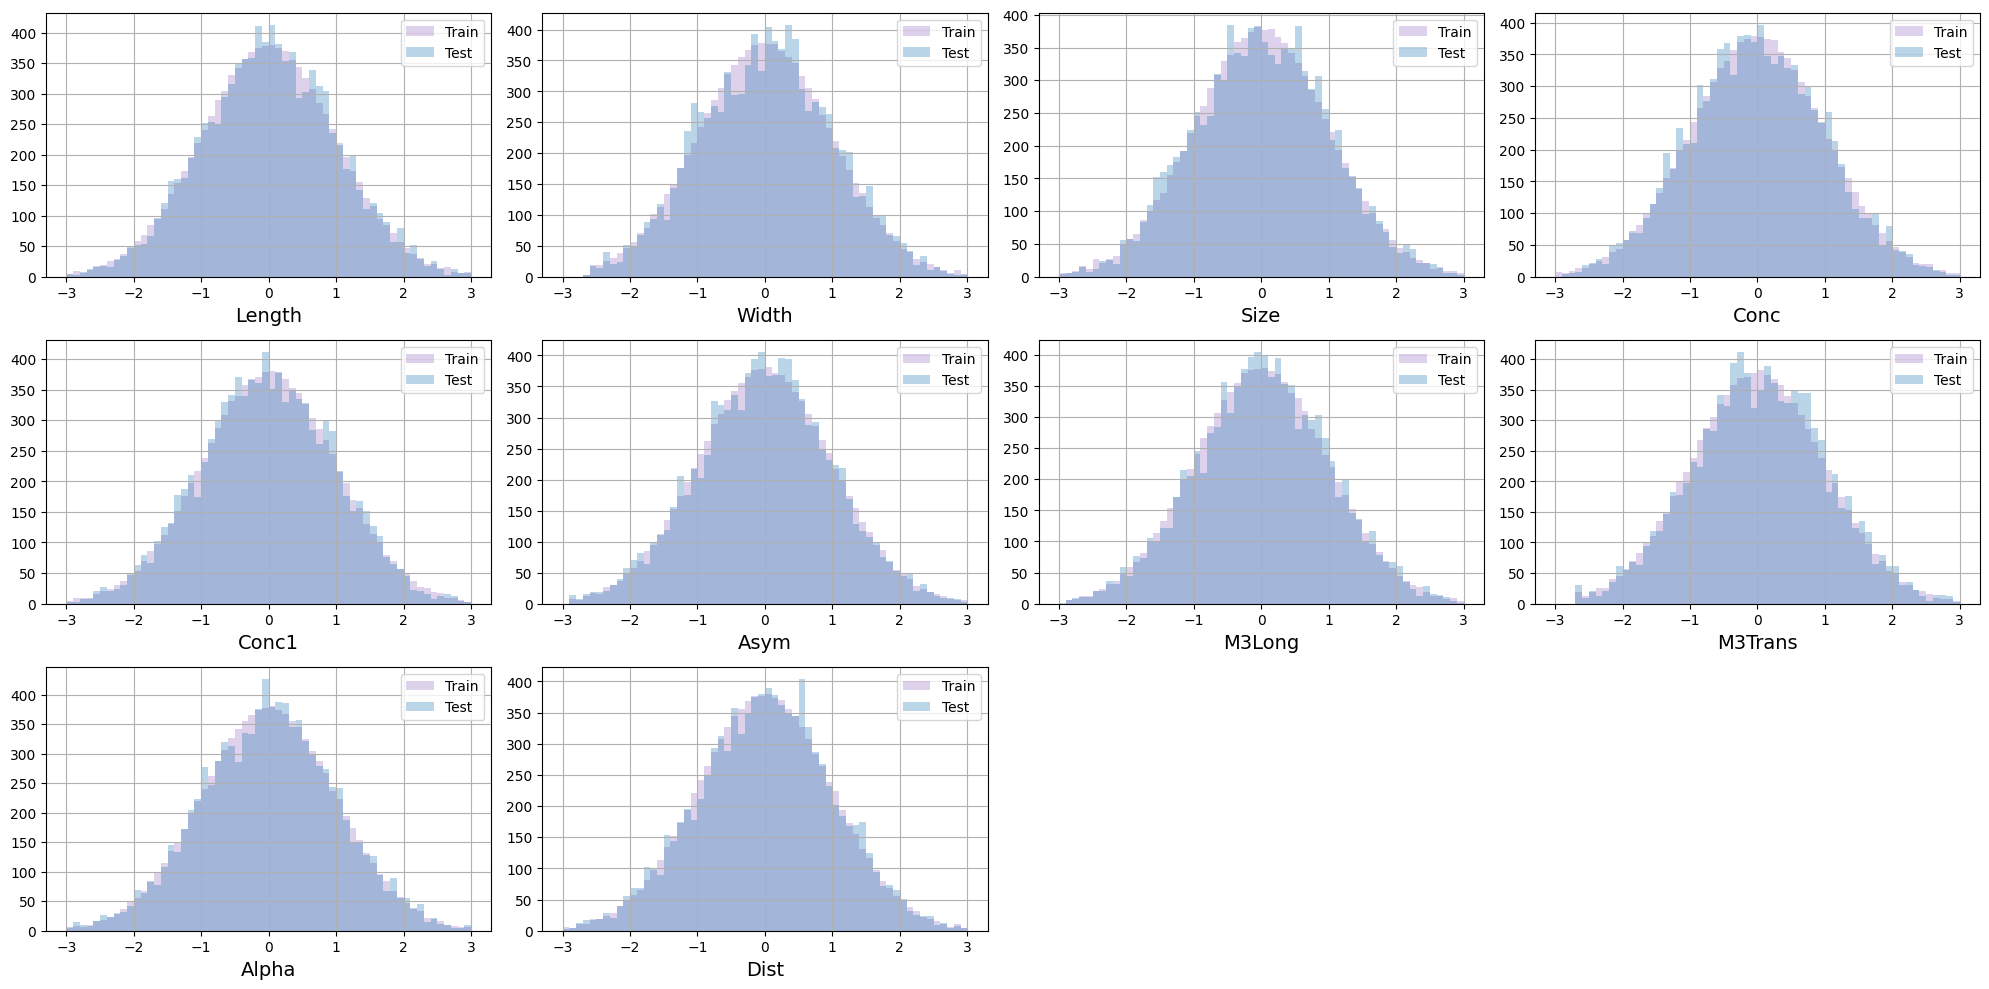

In [19]:
# Сравнение теста и трейна
plot_hists(X_train, X_test, names, label1="Train", label2="Test")

# Диффузионные модели (4 балла)

Проведем, по большому счету, такой же эксперимент, как в ДЗ-2, с диффузионной моделью.

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Задание 3 (0.5 балла)

Реализуйте фукнцию из семинара для зашумления данных, адаптировав ее под наш тип данных.

In [21]:
def corrupt(x, amount):
    noise = torch.rand_like(x)
    amount = amount.view(-1, 1)
    x = x * (1 - amount) + noise * amount
    return x

In [22]:
# Пример
x = torch.from_numpy(X_train[:2])
print(x.shape)
x

torch.Size([2, 10])


tensor([[ 0.1944,  0.2769,  0.7447, -0.6769, -0.6472,  0.6122,  0.2674, -1.3697,
          0.5638, -1.6520],
        [ 1.6141,  2.1005,  1.9854, -2.7690, -2.7772,  0.6152,  1.8188,  1.1840,
          1.5492,  0.0876]], dtype=torch.float64)

In [23]:
# Добавим немного шума
t = corrupt(x, torch.tensor([0.01]))
print(t.shape)
t

torch.Size([2, 10])


tensor([[ 0.1989,  0.2821,  0.7455, -0.6647, -0.6403,  0.6080,  0.2655, -1.3474,
          0.5622, -1.6324],
        [ 1.5982,  2.0885,  1.9678, -2.7330, -2.7425,  0.6156,  1.8041,  1.1769,
          1.5382,  0.0884]], dtype=torch.float64)

In [24]:
# Добавим много шума
t = corrupt(x, torch.tensor([0.99]))
print(t.shape)
t

torch.Size([2, 10])


tensor([[0.0785, 0.4863, 0.4853, 0.7066, 0.3516, 0.4285, 0.6173, 0.7782, 0.2437,
         0.0116],
        [0.9176, 0.4886, 0.8874, 0.0413, 0.2198, 0.6908, 0.5676, 0.1413, 0.4356,
         0.7999]], dtype=torch.float64)

Добавим sсheduler, он пригодится вам при обучении модели.

*Советуем вниматиельно почитать доку по шедулеру.*

In [25]:
from diffusers import DDPMScheduler

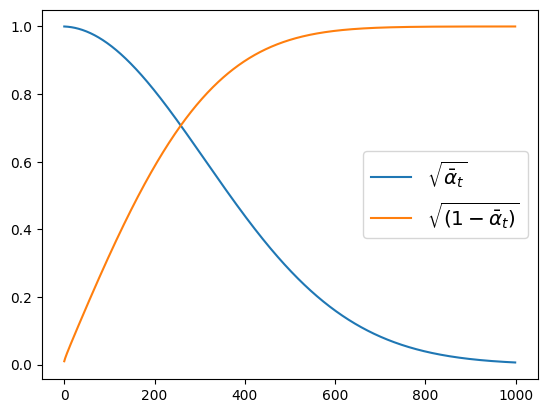

In [26]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)
plt.plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large")

## Задание 4 (0.5 балла)

Реализуйте нейронную сеть. В качетсве архитектуры можете взять модель генератора. В процессе экспериментов попробуйте изменять архитектуру модели для улучшения качества сгенерированных объектов (Кстати, как вы будете качество измерять?).

- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Выходной слой.

In [27]:
class DiffusionGenerator(nn.Module):
    def __init__(self, n_inputs, n_outputs, num_classes=2, class_emb_size=2, time_emb_size=3):
        super(DiffusionGenerator, self).__init__()

        # Эмбединг для условия генерации
        self.class_emb = nn.Embedding(num_classes, class_emb_size)

        # Embedding для времени шедулера
        self.time_mlp = nn.Sequential(
            nn.Linear(1, time_emb_size),
            nn.ReLU(),
            nn.Linear(time_emb_size, time_emb_size)
        )

        self.net = nn.Sequential(
            nn.Linear(n_inputs, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, n_outputs)
        )

    def forward(self, z, y, t):

        # Эмбединг условия
        y_emb = self.class_emb(y)
        y_emb = y_emb.squeeze(1)

        # Эмбеддинг времени (зашумление)
        t = t.float().unsqueeze(1)
        t_emb = self.time_mlp(t)

        # Собираем все эмбединги в 1 и передаем модели
        zy = torch.cat((z, y_emb, t_emb), dim=1)

        return self.net(zy)

## Задание 5 (0.5 балла)

Напишите функцию для генерации нового объекта с помощью обученной модели.

In [28]:
def generate_with_diffusion(model, y, latent_dim, noise_scheduler):

    y = y.detach().cpu().numpy()

    # Генерация шума и подготовка меток класса
    X_fake = torch.rand(len(y), latent_dim).to(DEVICE)
    cond = torch.from_numpy(y).long().to(DEVICE)

    for i, t in enumerate(noise_scheduler.timesteps):

      # Скалярное значение для шедулера, а так же подготовлю эмбединг t для модели
      t_scalar = t.item()
      t = t.unsqueeze(0).expand(len(X_fake), -1).squeeze(-1).to(DEVICE)

      with torch.no_grad():
          residual = model(z=X_fake, t=t, y=cond)

      # Обновление примеров
      X_fake = noise_scheduler.step(
          residual # Выход модели
          , t_scalar # Текущий временной шаг
          , X_fake # Текущее зашумленное состояние данных
          ).prev_sample

    return X_fake.detach().cpu().numpy()


## Задание 6 (2 балла)

Напишите класс обучения диффузионной модели и обучите модель, после чего опишите полученные результаты. В качестве подсказки - опирайтесь на семинар по диффузионным моделям. Вы можете изменять некоторые части кода для вашего удобства, но оставляйте в таком случаи комментарии, пожалуйста.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

In [37]:
def other_agent_score(X_real, y_real, X_fake, y_fake):
    """ Оцениваем способность модели к генерации фейковых объектов близких к реальным

    X_real: Признаки реальных объектов
    X_fake: Признаки фейковых объектов
    y_real: Тензор из единиц
    y_fake: Тензор из нулей

    """
    LR = LogisticRegression()

    # Соберем набор данных из трейна и теста
    X = np.concatenate((X_real.cpu().numpy(), X_fake), axis=0)
    y = np.concatenate((y_real, y_fake), axis=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=43)

    # Учим модель классифицироваль реальный и фейковый объект
    LR.fit(X_train, y_train)
    preds = LR.predict(X_test)

    acc_score = accuracy_score(preds, y_test)

    return acc_score

In [172]:
class DiffusionFitter(object):
    def __init__(
        self,
        model,
        batch_size = 32,
        n_epochs = 10,
        latent_dim = 1,
        lr = 0.0001,
        n_critic=5,
        noise_scheduler=DDPMScheduler(num_train_timesteps=1000, clip_sample=False),
    ):

        self.model = model
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr
        self.n_critic = n_critic
        self.noise_scheduler = noise_scheduler

        self.opt_gen = torch.optim.RMSprop(self.model.parameters(), lr=self.lr)
        #self.opt_gen = torch.optim.AdamW(self.model.parameters(), lr=self.lr, weight_decay=1e-4) # Костылил при попытке побить скор 0,65

        self.model.to(DEVICE)


    def fit(self, X, y):

        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=DEVICE)
        y_cond = torch.tensor(y, dtype=torch.long, device=DEVICE)


        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)

        loss_fn = nn.MSELoss()

        self.loss_history = []

        # Fit
        for epoch in range(self.n_epochs):
            self.model.train(True)

            loss_epoch = 0
            for i, (real_batch, cond_batch) in enumerate(
                  DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)
            ):

                # Создаем шум размерности real_batch
                noise = torch.randn_like(real_batch)

                # Времянной шаг для шедулера
                timesteps = torch.randint(0, 999, (real_batch.shape[0],)).long().to(DEVICE)

                # Зашумим оригинальные данные
                noisy_x = noise_scheduler.add_noise(real_batch, noise, timesteps)

                # Пропуск через модель, получаем предсказание шума
                pred = self.model(z=noisy_x, y=cond_batch.long(), t=timesteps)

                # Считаем ошибку MSE между настоящим шумом и предсказанным
                loss = loss_fn(pred, noise)

                # Обновляем веса модели
                self.opt_gen.zero_grad()
                loss.backward()
                self.opt_gen.step()

                loss_epoch += loss.item()

            self.loss_history.append(loss_epoch/len(dataset_real))


            #### Каждые 10 эпох генерируем сэмплы для оценки, проводим оценку и выводим метрики ####
            # (Для обучение в этом блоке принт выводил каждые 5 эпох)
            if (epoch + 1) % 10 == 0:
                self.model.eval()

                # Выборка 1000 объектов и условий из текущей эпохи (если меньше 100 - возьмем что есть)
                if len(X_real) >= 1000:
                    sampled_indices = torch.randint(0, len(X_real), (1000,))
                    real_sample = X_real[sampled_indices]
                    cond_sample = y_cond[sampled_indices]
                else:
                    real_sample = X_real
                    cond_sample = y_cond

                # Генерируем 1000 сэмплов
                X_fake = generate_with_diffusion(
                    model = self.model,
                    y = cond_sample,
                    latent_dim = self.latent_dim,
                    noise_scheduler = self.noise_scheduler
                    )

                # Вызываем функцию оценки other_agent_score
                score = other_agent_score(
                    X_real = real_sample,
                    y_real = np.ones(len(real_sample)),
                    X_fake = X_fake,
                    y_fake = np.zeros(len(X_fake))
                    )

                print(f"Epoch {epoch + 1}/{self.n_epochs}, Loss: {self.loss_history[-1]:.6f}, other_agent_score: {score:.4f}")

        self.model.train(False)

In [ ]:
%%time

noise_scheduler = DDPMScheduler(
    num_train_timesteps=1000,
    clip_sample=False
)

latent_dim = 10
class_emb_size = 2 # Размер эмбединга условия (у нас условие 1 или 0, поэтому не делал большим)
time_emb_size = 3 # Размер эмбединга временного шага шедулера зашумления (С большим размером модель хуже обучается, возможно мало данных для обучения)

model = DiffusionGenerator(
    n_inputs=latent_dim + class_emb_size + time_emb_size,
    n_outputs=X_train.shape[1],
    time_emb_size=time_emb_size
    )

diffusionFitter = DiffusionFitter(
    model,
    batch_size=50,
    n_epochs=100,
    latent_dim=latent_dim,
    lr=0.0001,
    n_critic=5,
    noise_scheduler=noise_scheduler
)

diffusionFitter.fit(X_train, y_train)

Epoch 5/100, Loss: 0.006107, other_agent_score: 0.7150
Epoch 10/100, Loss: 0.005823, other_agent_score: 0.7150
Epoch 15/100, Loss: 0.005570, other_agent_score: 0.7217
Epoch 20/100, Loss: 0.005565, other_agent_score: 0.6650
Epoch 25/100, Loss: 0.005581, other_agent_score: 0.6583
Epoch 30/100, Loss: 0.005427, other_agent_score: 0.6633
Epoch 35/100, Loss: 0.005513, other_agent_score: 0.6583
Epoch 40/100, Loss: 0.005392, other_agent_score: 0.6500
Epoch 45/100, Loss: 0.005340, other_agent_score: 0.6583
Epoch 50/100, Loss: 0.005407, other_agent_score: 0.6750
Epoch 55/100, Loss: 0.005430, other_agent_score: 0.6200
Epoch 60/100, Loss: 0.005187, other_agent_score: 0.6383
Epoch 65/100, Loss: 0.005203, other_agent_score: 0.5583
Epoch 70/100, Loss: 0.005017, other_agent_score: 0.6017
Epoch 75/100, Loss: 0.004922, other_agent_score: 0.5533
Epoch 80/100, Loss: 0.005028, other_agent_score: 0.5583
Epoch 85/100, Loss: 0.004793, other_agent_score: 0.5333
Epoch 90/100, Loss: 0.004817, other_agent_score: 

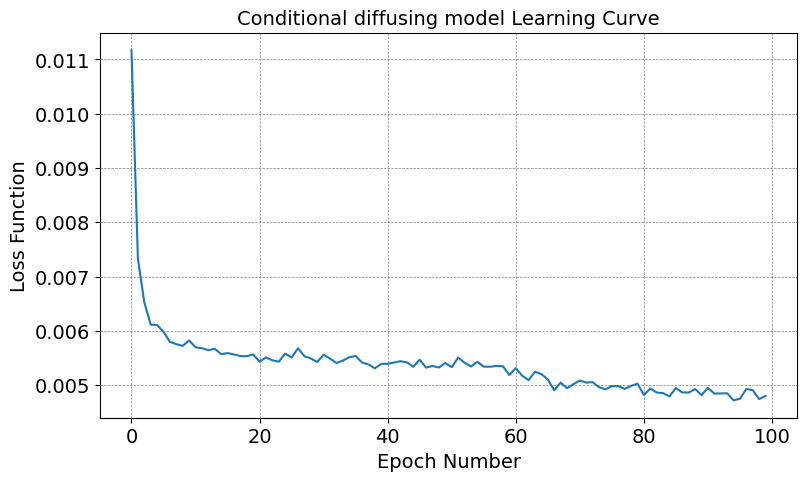

In [ ]:
# diffusion learning curve
plt.figure(figsize=(9, 5))
plt.plot(diffusionFitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional diffusing model Learning Curve", size=14)
plt.grid(linestyle="--", linewidth=0.5, color="0.5")
plt.show()

## Задание 7 (0.5 балла)
По аналогии с прошлым экспериментом (из ДЗ-2) с GAN моделью сгенерируйте выборку фейковых объектов, равную размеру тестовой выборки, и обучите градиентный бустинг. Обучите модель отличать реальные объекты от фейковых, после чего расчитайте метрики ROC-AUC и accuracy score. Какие получились результаты? Как вы их оцениваете? А в сравнении с сWGAN моделью?

In [ ]:
# Генерируем данные на основе тренировочной части
preds_train = generate_with_diffusion(
    model=model,
    y=torch.from_numpy(y_train),
    latent_dim=latent_dim,
    noise_scheduler=diffusionFitter.noise_scheduler
    )

# генерируем данные на основе тестовой части
preds_test = generate_with_diffusion(
    model=model,
    y=torch.from_numpy(y_test),
    latent_dim=latent_dim,
    noise_scheduler=diffusionFitter.noise_scheduler
    )

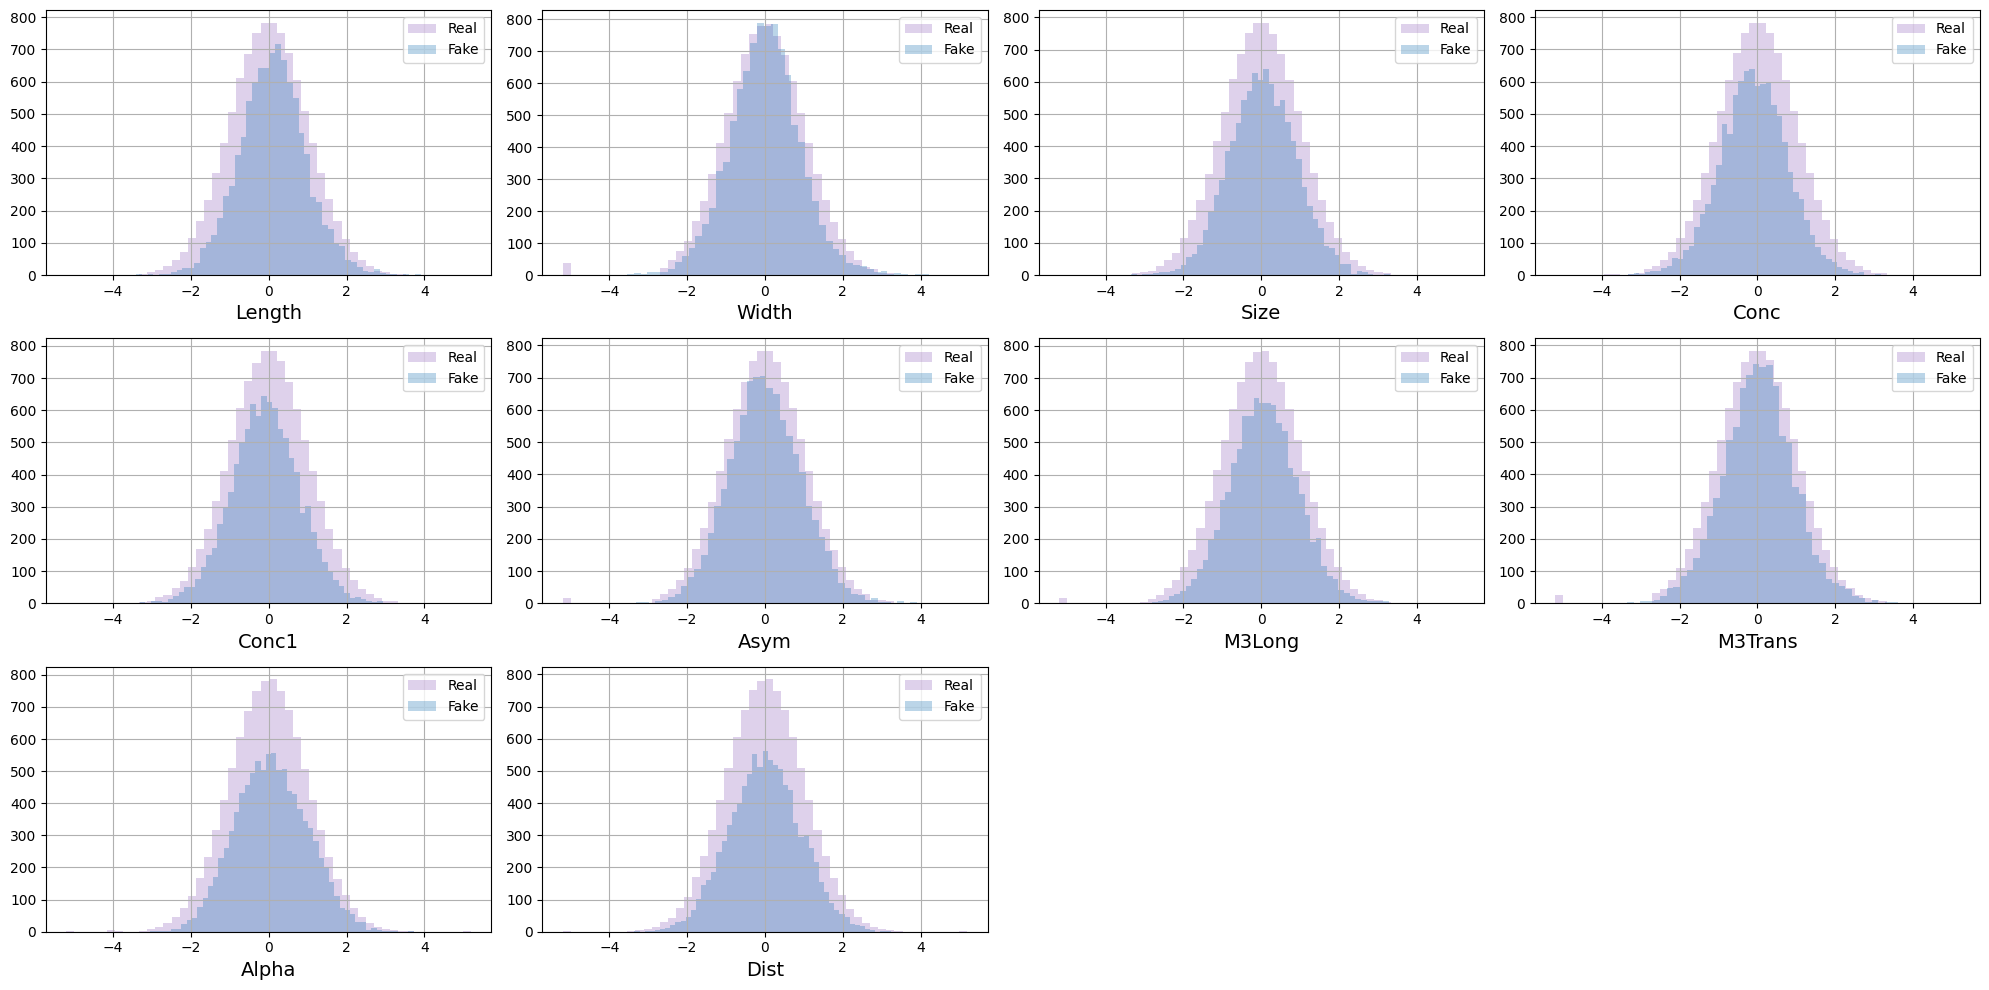

In [ ]:
# Train
plot_hists(X_train, preds_train, names, label1="Real", label2="Fake", bins=50)

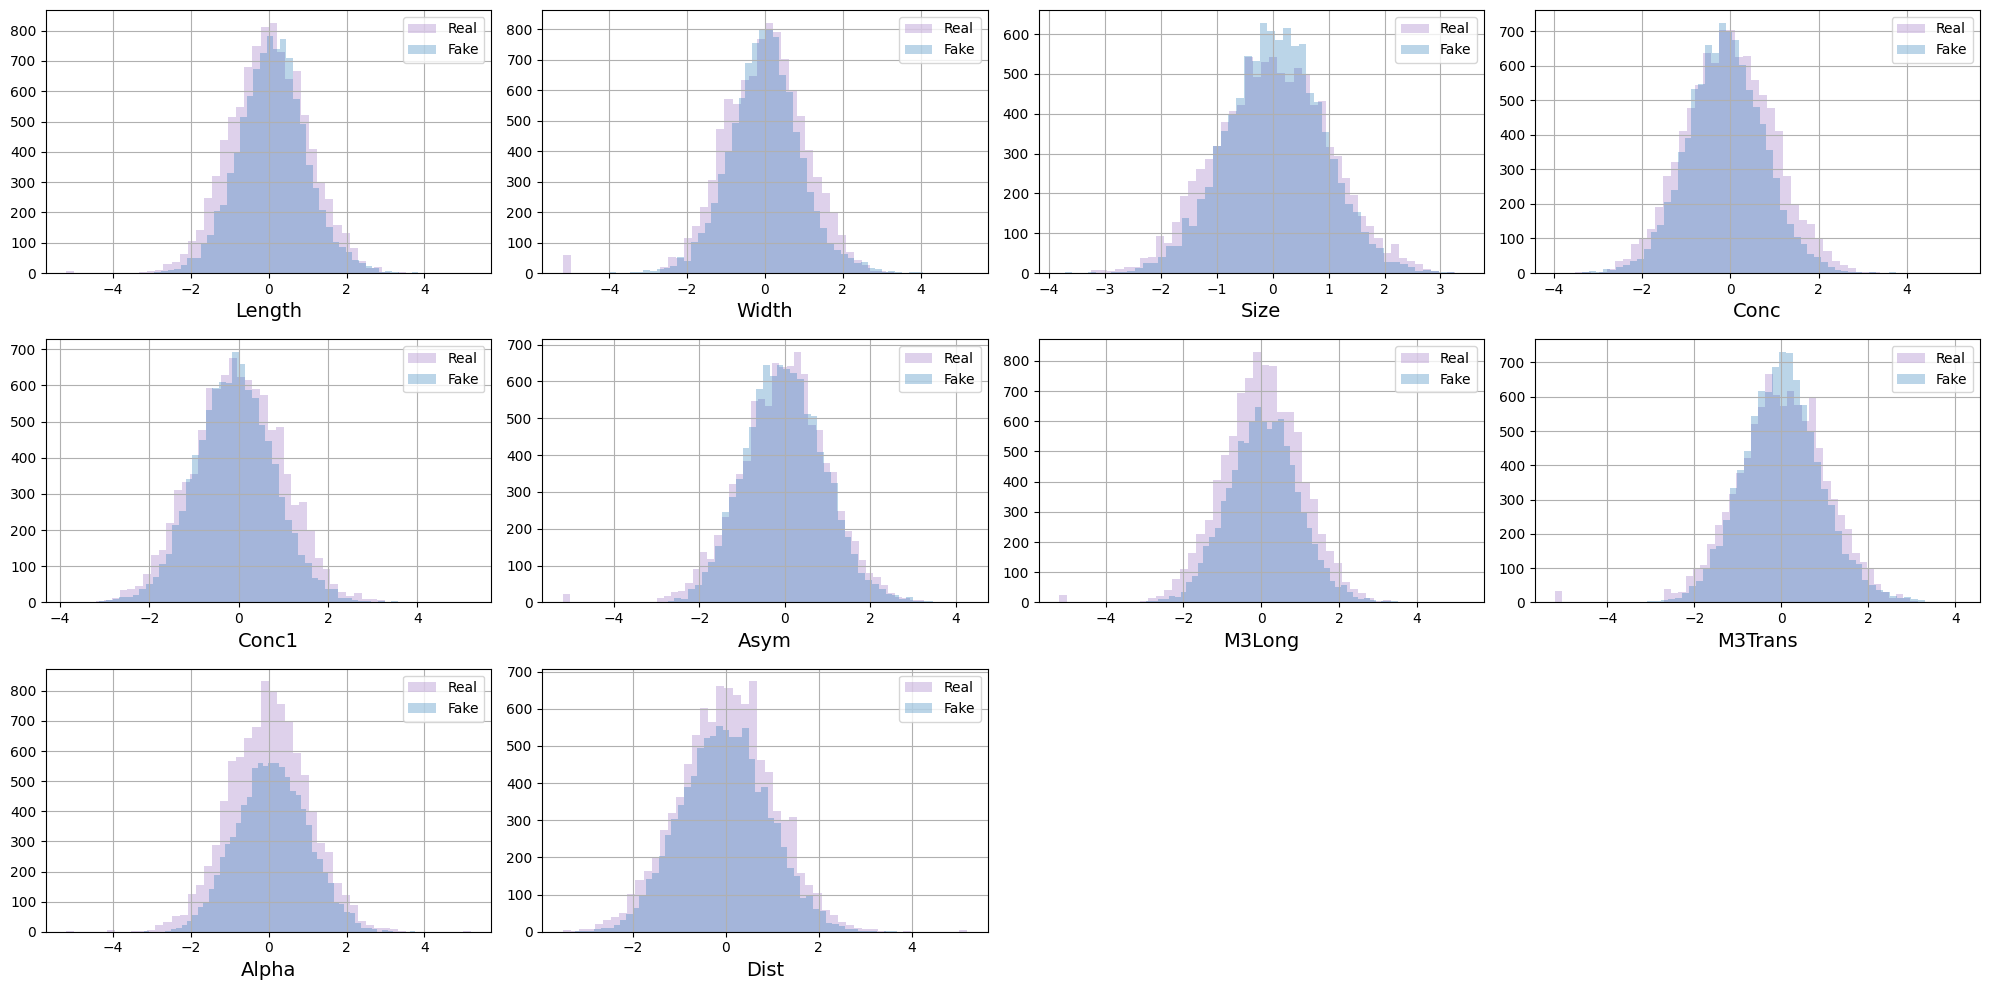

In [ ]:
# Test
plot_hists(X_test, preds_test, names, label1="Real", label2="Fake", bins=50)

In [ ]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((preds_train, X_train), axis=0)
XX_test = np.concatenate((preds_test, X_test), axis=0)

yy_train = np.array([0] * len(preds_train) + [1] * len(X_train))
yy_test = np.array([0] * len(preds_test) + [1] * len(X_test))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.6928381602850948


<!--  -->

Качество ROC AUC =  0.69 для модели, скорее всего, максимально низкое (в нашей задаче эквивалентно максимально хорошему), так как в основном скор был 0.71-0.73

<!--  -->

# Потоки (4 балла)

## Задание 8 (1.5 балла)

Диффузия показала себя как достойный конкурент GAN модели. Так как данных не много, обучали не долго, задача не сложная - отличия от GAN не так заметны, но все равно достойные.

Для Diffusion получили ROC AUC около 0.73 (меньше лучше). Попробуем обучить RealNVP для решения этой задачи.

**Дополните базовый класс для нормализационного необходимым.**

<center><img src="https://raw.githubusercontent.com/hushchyn-mikhail/gen_models_ai_hse/3ce5af8a2e783907cdf9f093f62fef659040241d/2024/homeworks/hw3/img/mem1.jpg" width="500"></center>

<center><img src="https://raw.githubusercontent.com/hushchyn-mikhail/gen_models_ai_hse/3ce5af8a2e783907cdf9f093f62fef659040241d/2024/homeworks/hw3/img/mem2.jpg" width="500"></center>

In [192]:
trainloader = torch.utils.data.DataLoader(X_train, batch_size=64, shuffle=True)

In [233]:
class NormalizingFlow(nn.Module):

    def __init__(self, layers, prior):
        super(NormalizingFlow, self).__init__()

        # Инициализируем список слоев и приорного распределения
        self.layers = nn.ModuleList(layers)
        self.prior = prior

    def log_prob(self, x):
        log_likelihood = None

        # Последовательное применение прямых преобразований
        for layer in self.layers:
            x, log_det_jacobian = layer.f(x)

            # Накопление логарифма правдоподобия
            if log_likelihood is not None:
                log_likelihood += log_det_jacobian
            else:
                log_likelihood = log_det_jacobian

        log_likelihood += self.prior.log_prob(x)

        return log_likelihood.mean()

    def sample(self, num_samples):
        # Генерируем выборку из приорного распределения
        x = self.prior.sample((num_samples, ))

        # Обратного преобразование
        for layer in self.layers[::-1]:
            x = layer.g(x)

        return x

## Задание 9 (2 балла)

Реализуйте нейронную сеть RealNVP. Возьмите для прямого и обратного преобразования нейронную сеть (функцию) со следующими параметрами:

- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Выходной слой.

In [194]:
import torch.nn as nn

class RealNVP(nn.Module):
    def __init__(self, var_size, mask, hidden=100):
        super(RealNVP, self).__init__()
        """"
        var_size: размер входного вектора данных
        mask: маска для разделения переменных на две части: которая останется неизменной, и которую преобразуем
        hidden: размер скрытого слоя
        """
        self.mask = mask
        self.var_size = var_size

        # Сдвиг
        self.nn_t = nn.Sequential(
            nn.Linear(var_size, hidden),
            nn.ReLU(),
            nn.Linear(hidden, var_size)
        )

        # Масштабирование
        self.nn_s = nn.Sequential(
            nn.Linear(var_size, hidden),
            nn.ReLU(),
            nn.Linear(hidden, var_size)
        )

    def f(self, x):
        """"Прямое преобразование"""

        x1 = self.mask * x  # Данные останутся неизменными
        x2 = (1 - self.mask) * x  # ДАнные которые преобразуем

        # Вычисляем сдвиг и масштабирование
        t = self.nn_t(x1)
        s = self.nn_s(x1)

        # Ограничиваем значения сдвига
        s = torch.clamp(s, min=-10, max=10)

        # Новое преобразованное x
        new_x = x1 + (1 - self.mask) * (x2 * torch.exp(s) + t)

        # Лог-детерминант Якобиана
        log_det = torch.sum((1 - self.mask) * s, dim=1)

        return new_x, log_det

    def g(self, x):
        """"Обратное преобразование"""

        x1 = self.mask * x  # Данные останутся неизменными
        x2 = (1 - self.mask) * x  # ДАнные которые преобразуем

        # Вычисляем сдвиг и масштабирование
        t = self.nn_t(x1)
        s = self.nn_s(x1)

        s = torch.clamp(s, min=-10, max=10)

        # Обратное преобразование для выборки
        new_x = x1 + (1 - self.mask) * ((x2 - t) * torch.exp(-s))

        return new_x

In [195]:
def train_nf(tr_dataloader, nf, opt, num_epochs):
    nf.train()

    loss_trace = []

    for epoch_i in range(num_epochs):
        print(f'Epoch {epoch_i + 1}')
        for batch in tr_dataloader:

            x = batch.float()

            # Negative Log-Likelihood
            loss = -nf.log_prob(x)

            opt.zero_grad()
            loss.backward()
            opt.step()

            loss_trace.append(loss.item())

    return loss_trace


In [196]:
prior = torch.distributions.MultivariateNormal(torch.zeros(10), torch.eye(10))

layers = []
for i in range(4):
    layers.append(RealNVP(var_size=10, mask=((torch.arange(10) + i) % 2)))

nf = NormalizingFlow(layers=layers,
                    prior=prior)

opt = torch.optim.Adam(nf.parameters(), lr=1e-3)

In [197]:
loss_trace = train_nf(trainloader, nf, opt, num_epochs=10)

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10


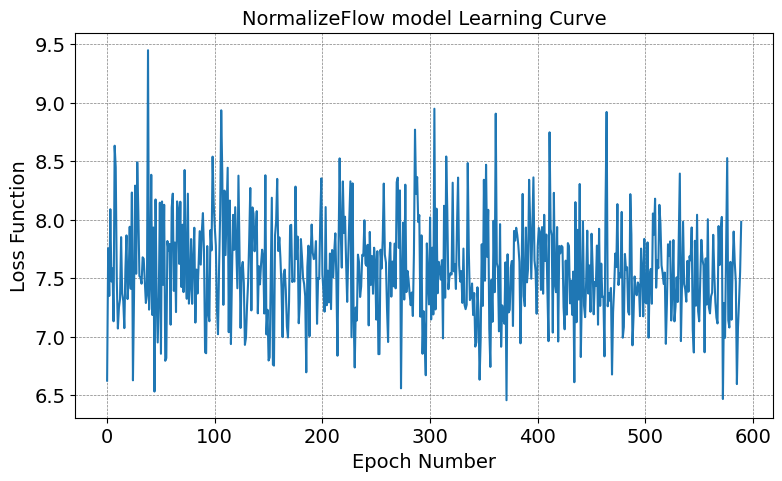

In [198]:
plt.figure(figsize=(9, 5))
plt.plot(loss_trace[900:])
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("NormalizeFlow model Learning Curve", size=14)
plt.grid(linestyle="--", linewidth=0.5, color="0.5")
plt.show()

## Задание 10 (0.5 балла)

По аналогии с прошлым экспериментом с диффузией сгенерируйте выборку фейковых объектов, равную размеру тестовой выборки, и обучите градиентный бустинг. Обучите модель отличать реальные объекты от фейковых, после чего расчитайте метрики ROC-AUC и accuracy score. Какие получились результаты? Как вы их оцениваете? А в сравнении с остальными моделями?

In [199]:
# Сгенерируем тестовую и тренировочную выборку
num_samples = X_train.shape[0]

nf.eval()
with torch.no_grad():
    fake_samples = nf.sample(num_samples)

fake_samples_train = fake_samples.cpu().numpy()


num_samples = X_test.shape[0]

nf.eval()
with torch.no_grad():
    fake_samples = nf.sample(num_samples)

fake_samples_test = fake_samples.cpu().numpy()

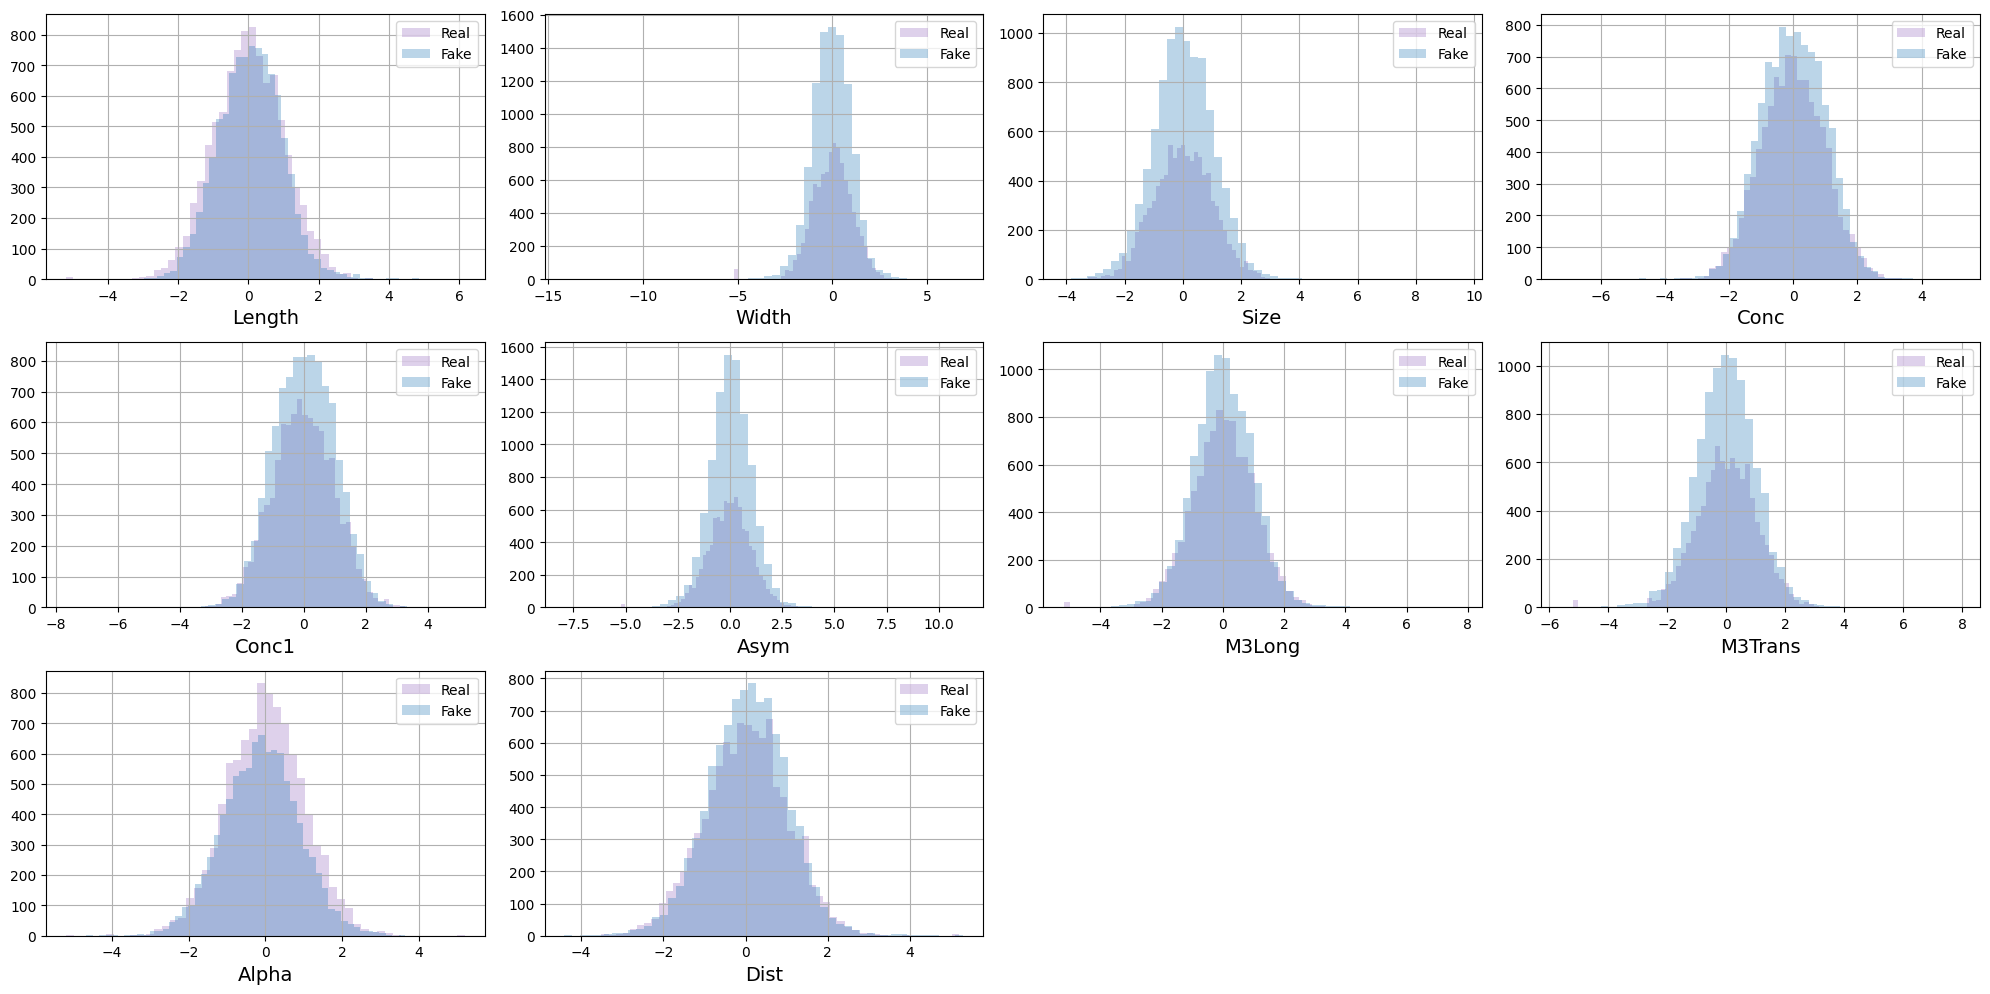

In [200]:
# Сравнение тестовых данных - реальные и фейковые
plot_hists(X_test, fake_samples_test, names, label1="Real", label2="Fake", bins=50)

In [201]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((fake_samples_train, X_train), axis=0)
XX_test = np.concatenate((fake_samples_test, X_test), axis=0)

yy_train = np.array([0] * len(fake_samples_train) + [1] * len(X_train))
yy_test = np.array([0] * len(fake_samples_test) + [1] * len(X_test))

In [202]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [203]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.6681624633320838


# Улучшения (1+ балл)

Попробуйте настроить параметры обучения какой-нибудь модели или еще как-нибудь их улучшить, чтобы получить как можно меньший ROC AUC. Что получилось? Какая модель лучше?

Ставим 0.1 балл за каждую сотую скора сверх (сниз) ROC-AUC=0.65 невключительно. Т.е. за 0.65 получаете 0, за 0.649 -- 0.1, 0.639 -- 0.2, 0.609 -- 0.5, 0.559 -- 1

<!--  -->

___0.6224617453983354 - лучший скор при доработке модели норм потоков___

<!--  -->

## Попытка улучшить Диффузию: 0.65 (не побил)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [140]:
class DiffusionGenerator_modifed(nn.Module):
    def __init__(self, n_inputs, n_outputs, num_classes=2, class_emb_size=2, time_emb_size=3):
        super(DiffusionGenerator_modifed, self).__init__()

        # Эмбединг для условия генерации
        self.class_emb = nn.Embedding(num_classes, class_emb_size)

        # Embedding для времени шедулера
        self.time_mlp = nn.Sequential(
            nn.Linear(1, time_emb_size),
            nn.ReLU(),
            nn.Linear(time_emb_size, time_emb_size)
        )

        self.net = nn.Sequential(

            nn.Linear(n_inputs, 128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1),

            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(64),

            nn.Linear(64, n_outputs)
        )

    def forward(self, z, y, t):

        # Эмбединг условия
        y_emb = self.class_emb(y)
        y_emb = y_emb.squeeze(1)

        # Эмбеддинг времени
        t = t.float().unsqueeze(1)
        t_emb = self.time_mlp(t)

        zy = torch.cat((z, y_emb, t_emb), dim=1)

        return self.net(zy)

In [176]:
class DiffusionGenerator_modifed(nn.Module):
    def __init__(self, n_inputs, n_outputs, num_classes=2, class_emb_size=2, time_emb_size=3):
        super(DiffusionGenerator_modifed, self).__init__()

        # Эмбединг для условия генерации
        self.class_emb = nn.Embedding(num_classes, class_emb_size)

        # Embedding для времени шедулера
        self.time_mlp = nn.Sequential(
            nn.Linear(1, time_emb_size),
            nn.ReLU(),
            nn.Linear(time_emb_size, time_emb_size)
        )

        # Основная сеть с пропускными соединениями
        self.input_layer = nn.Linear(n_inputs, 128)

        self.layer_1 = nn.Sequential(
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128)
        )

        # self.layer_2 = nn.Sequential(
        #     nn.LeakyReLU(0.2),
        #     nn.Linear(128, 128),
        #     nn.BatchNorm1d(128)
        # )

        # self.layer_3 = nn.Sequential(
        #     nn.LeakyReLU(0.2),
        #     nn.Linear(64, 64),
        #     nn.BatchNorm1d(64)
        # )

        self.output_layer = nn.Linear(128, n_outputs)

    def forward(self, z, y, t):
            # Эмбединг условия
            y_emb = self.class_emb(y)
            y_emb = y_emb.squeeze(1)

            # Эмбеддинг времени
            t = t.float().unsqueeze(1)
            t_emb = self.time_mlp(t)

            # Конкатенация входных данных, эмбеддинга условия и времени
            zy = torch.cat((z, y_emb, t_emb), dim=1)

            # Первый слой
            x = self.input_layer(zy)
            residual_1 = x  # Сохраняем для пропускного соединения

            # Второй слой
            x = self.layer_1(x)
            x = x + residual_1  # Добавляем пропускное соединение

            # # Третий слой (уменьшение размерности, нет skip connection)
            # x = self.layer_2(x)

            # # Четвертый слой
            # x = self.layer_3(x)

            # Финальный вывод
            output = self.output_layer(x)

            return output


In [178]:
%%time

noise_scheduler = DDPMScheduler(
    num_train_timesteps=1000,
    clip_sample=False
)

latent_dim = 10
class_emb_size = 2
time_emb_size = 3

model_diff = DiffusionGenerator_modifed(
    n_inputs=latent_dim + class_emb_size + time_emb_size,
    n_outputs=X_train.shape[1],
    time_emb_size=time_emb_size
    )

diffusionFitter_upd = DiffusionFitter(
    model_diff,
    batch_size=50,
    n_epochs=150,
    latent_dim=latent_dim,
    lr=0.001,
    n_critic=5,
    noise_scheduler=noise_scheduler
)

diffusionFitter_upd.fit(X_train, y_train)

Epoch 10/150, Loss: 0.004829, other_agent_score: 0.7933
Epoch 20/150, Loss: 0.004633, other_agent_score: 0.7000
Epoch 30/150, Loss: 0.004552, other_agent_score: 0.6700
Epoch 40/150, Loss: 0.004667, other_agent_score: 0.6817
Epoch 50/150, Loss: 0.004489, other_agent_score: 0.5850
Epoch 60/150, Loss: 0.004557, other_agent_score: 0.5833
Epoch 70/150, Loss: 0.004515, other_agent_score: 0.6017
Epoch 80/150, Loss: 0.004554, other_agent_score: 0.6033
Epoch 90/150, Loss: 0.004371, other_agent_score: 0.5767
Epoch 100/150, Loss: 0.004459, other_agent_score: 0.6000
Epoch 110/150, Loss: 0.004393, other_agent_score: 0.5417
Epoch 120/150, Loss: 0.004497, other_agent_score: 0.5533
Epoch 130/150, Loss: 0.004475, other_agent_score: 0.5750
Epoch 140/150, Loss: 0.004369, other_agent_score: 0.5450
Epoch 150/150, Loss: 0.004371, other_agent_score: 0.5000
CPU times: user 1min 35s, sys: 2.43 s, total: 1min 37s
Wall time: 1min 36s


In [188]:
preds_train = generate_with_diffusion(
    model=model_diff,
    y=torch.from_numpy(y_train),
    latent_dim=latent_dim,
    noise_scheduler=diffusionFitter_upd.noise_scheduler
    )

preds_test = generate_with_diffusion(
    model=model_diff,
    y=torch.from_numpy(y_test),
    latent_dim=latent_dim,
    noise_scheduler=diffusionFitter_upd.noise_scheduler
    )

In [189]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((preds_train, X_train), axis=0)
XX_test = np.concatenate((preds_test, X_test), axis=0)

yy_train = np.array([0] * len(preds_train) + [1] * len(X_train))
yy_test = np.array([0] * len(preds_test) + [1] * len(X_test))

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.7379245876552547


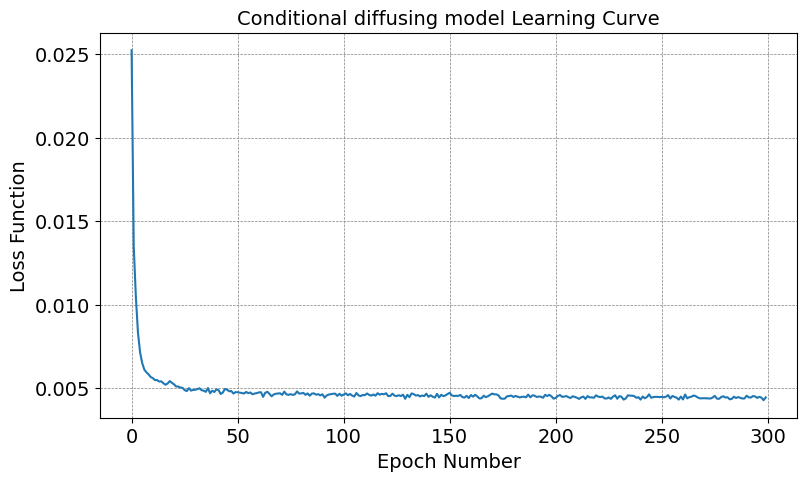

In [190]:
# diffusion learning curve
plt.figure(figsize=(9, 5))
plt.plot(diffusionFitter_upd.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional diffusing model Learning Curve", size=14)
plt.grid(linestyle="--", linewidth=0.5, color="0.5")
plt.show()

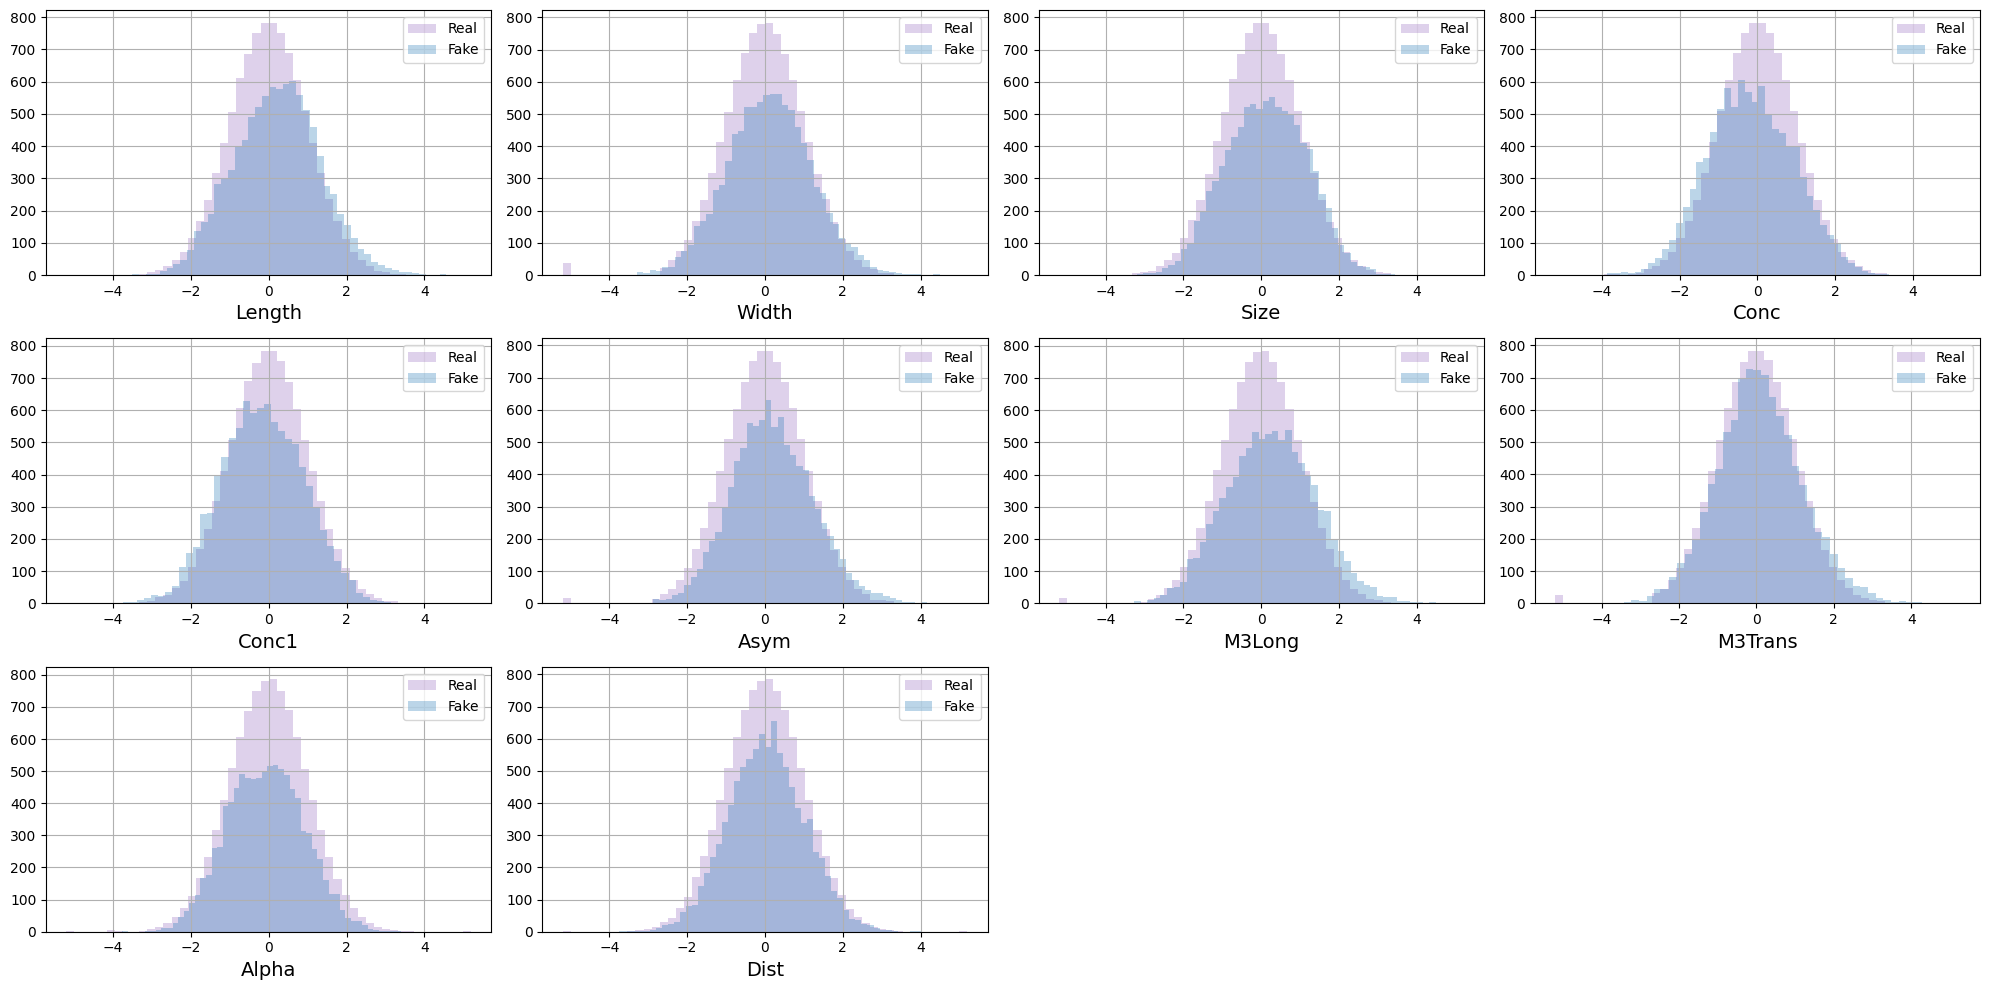

In [191]:
# Train
plot_hists(X_train, preds_train, names, label1="Real", label2="Fake", bins=50)

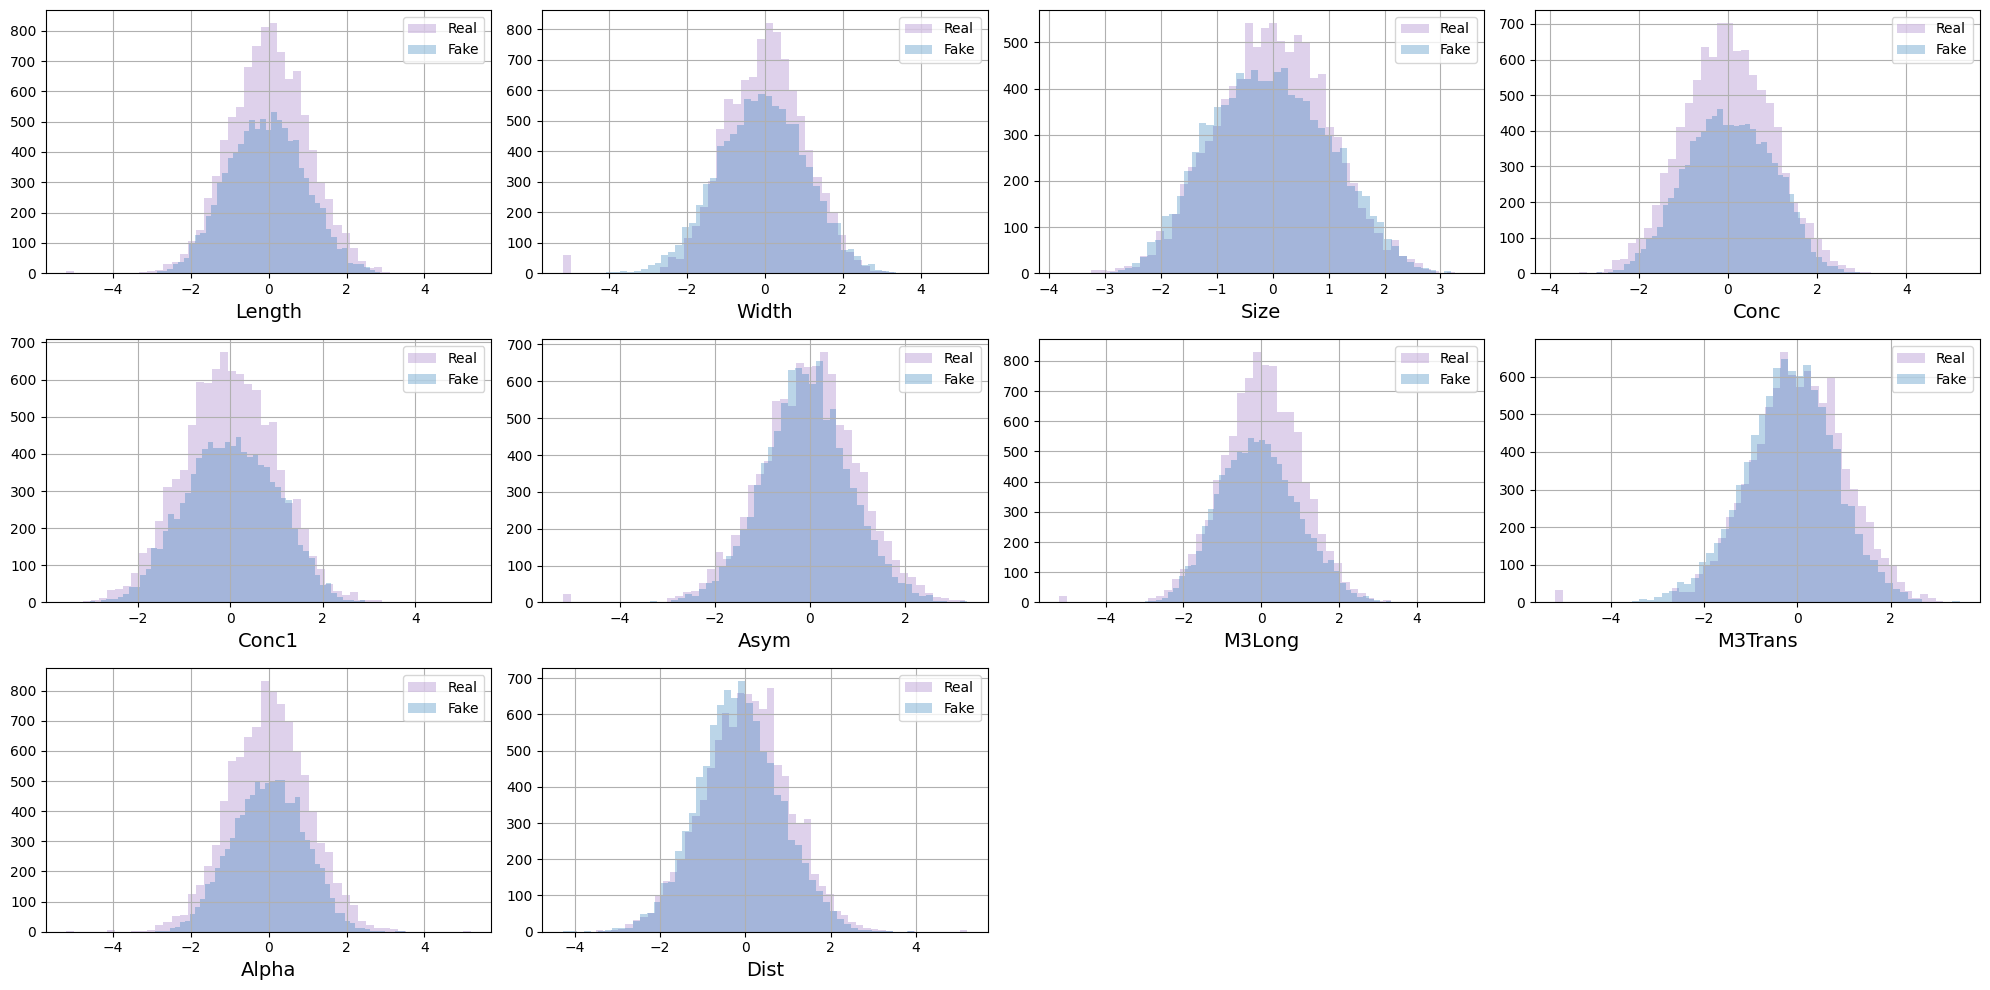

In [182]:
# Test
plot_hists(X_test, preds_test, names, label1="Real", label2="Fake", bins=50)

In [98]:
# Лучший результат, уже не помню какая точно архитектура была (несколько блоков, skip connection, drop out и LeakyReLU присутсвовали)

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.6646283506984181


## Попытка улучшить потоки - успешная

In [295]:
class RealNVP(nn.Module):
    def __init__(self, var_size, mask, hidden=100):
        super(RealNVP, self).__init__()
        """"
        var_size: размер входного вектора данных
        mask: маска для разделения переменных на две части: которая останется неизменной, и которую преобразуем
        hidden: размер скрытого слоя
        """
        self.mask = mask
        self.var_size = var_size

        # Сдвиг
        self.nn_t = nn.Sequential(
            nn.Linear(var_size, hidden),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden, var_size)

            # nn.Linear(var_size, hidden),
            # nn.ReLU(),
            # nn.Dropout(0.1),
            # nn.Linear(hidden, var_size)
        )

            #nn.BatchNorm1d(64)
        # Масштабирование
        self.nn_s = nn.Sequential(
            nn.Linear(var_size, hidden),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1),
            nn.Linear(hidden, hidden*2),

            nn.LeakyReLU(0.2),
            nn.Linear(hidden*2, hidden*2),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1),
            nn.Linear(hidden*2, hidden),


            nn.LeakyReLU(0.2),
            nn.Linear(hidden, hidden),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1),
            nn.Linear(hidden, var_size)
        )

    def f(self, x):
        """"Прямое преобразование"""

        x1 = self.mask * x  # Данные останутся неизменными
        x2 = (1 - self.mask) * x  # ДАнные которые преобразуем

        # Вычисляем сдвиг и масштабирование
        t = self.nn_t(x1)
        s = self.nn_s(x1)

        # Ограничиваем значения сдвига
        s = torch.clamp(s, min=-10, max=10)

        # Новое преобразованное x
        new_x = x1 + (1 - self.mask) * (x2 * torch.exp(s) + t)

        # Лог-детерминант Якобиана (log_det_jacobian)
        log_det = torch.sum((1 - self.mask) * s, dim=1)

        return new_x, log_det

    def g(self, x):
        """"Обратное преобразование"""

        x1 = self.mask * x  # Данные останутся неизменными
        x2 = (1 - self.mask) * x  # Часть данных, # ДАнные которые преобразуем

        # Вычисляем сдвиг и масштабирование
        t = self.nn_t(x1)
        s = self.nn_s(x1)

        s = torch.clamp(s, min=-10, max=10)

        # Обратное преобразование для выборки
        new_x = x1 + (1 - self.mask) * ((x2 - t) * torch.exp(-s))

        return new_x

In [296]:
prior = torch.distributions.MultivariateNormal(torch.zeros(10), torch.eye(10))

layers = []
for i in range(4):
    layers.append(RealNVP(var_size=10, mask=((torch.arange(10) + i) % 2), hidden=150))

nf = NormalizingFlow(
    layers=layers,
    prior=prior
    )

opt = torch.optim.Adam(nf.parameters(), lr=1e-3)

loss_trace = train_nf(trainloader, nf, opt, num_epochs=20)

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20


In [297]:
# Создадим фейковые данные
num_samples = X_train.shape[0]

nf.eval()
with torch.no_grad():
    fake_samples = nf.sample(num_samples)

fake_samples_train = fake_samples.cpu().numpy()

num_samples = X_test.shape[0]

nf.eval()
with torch.no_grad():
    fake_samples = nf.sample(num_samples)

fake_samples_test = fake_samples.cpu().numpy()


# Выборка для бустинга
XX_train = np.concatenate((fake_samples_train, X_train), axis=0)
XX_test = np.concatenate((fake_samples_test, X_test), axis=0)

yy_train = np.array([0] * len(fake_samples_train) + [1] * len(X_train))
yy_test = np.array([0] * len(fake_samples_test) + [1] * len(X_test))


# Бустинг
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

yy_test_proba = clf.predict_proba(XX_test)[:, 1]

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.6224617453983354


Лучший скор, остальные эксперементы потер ибо их было очень много и ноутбук не читаемый был

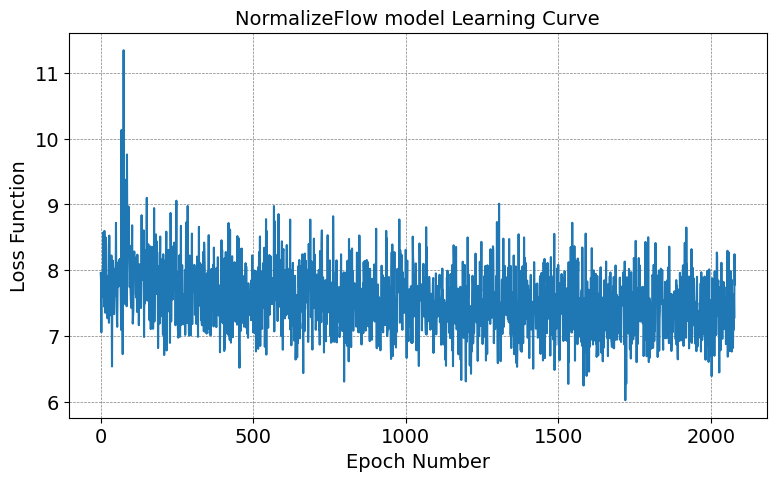

In [298]:
# Ошибка лучшей модели
plt.figure(figsize=(9, 5))
plt.plot(loss_trace[900:])
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("NormalizeFlow model Learning Curve", size=14)
plt.grid(linestyle="--", linewidth=0.5, color="0.5")
plt.show()

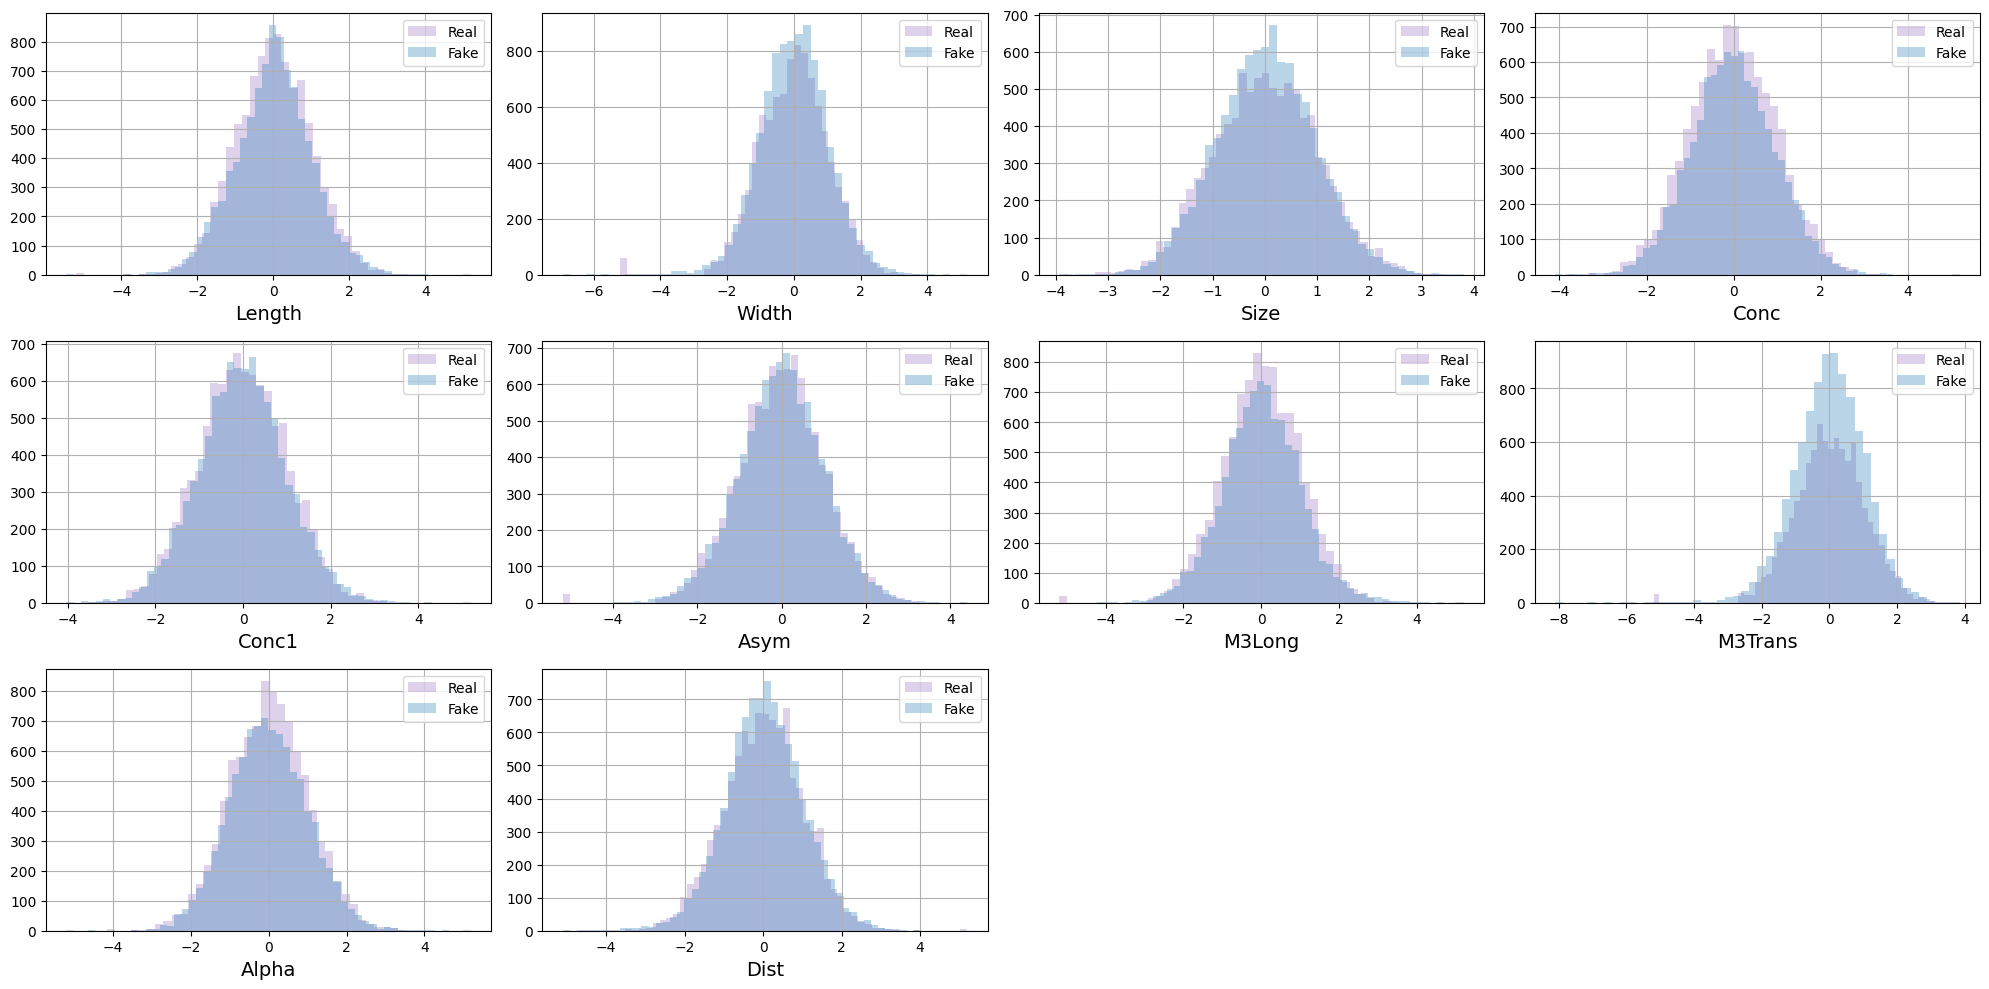

In [299]:
# распределение тестовых данных: реальных и фейковых (лучшей модели)
plot_hists(X_test, fake_samples_test, names, label1="Real", label2="Fake", bins=50)

# (*) Аналитика (1 балл)

***Убедительно* подвтердите или опровергните гипотезу "Синтетические данные НЕ помогают лучше классифицировать частицы из исходного датасета."**

Здесь от вас ожидается что-то в духе аналитической записки. Приветствуются графики и прочие "умные вещи". На максимальный балл это весьма объемное задание.